In [1]:
!pip install librosa

     --------------------------------------- 14.0/14.0 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Public\\anaconda\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [3]:
data_path = r"C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound"
print(os.listdir(data_path))

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal', 'unlabel']


In [4]:
tarin_data      = data_path 
unlabel_data    = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"

In [5]:
print("Normal files:", len(os.listdir(normal_data))) #length of normal training sounds
print("Murmur files:",len(os.listdir(murmur_data))) #length of murmur training sounds 
print("Extrastole files", len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print("Artifact files:",len(os.listdir(artifact_data))) #length of artifact training sounds 
print("Extrahls files:",len(os.listdir(extrahls_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


In [6]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  247


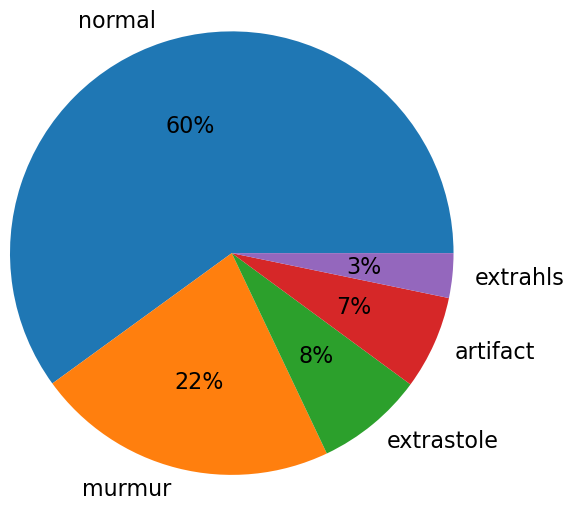

AttributeError: module 'matplotlib' has no attribute 'pyplot'

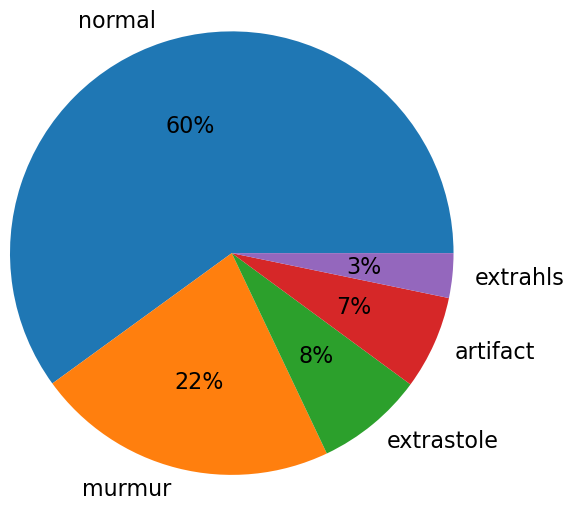

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [7]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

In [8]:
def visulize_random_sample(folder_name):
  #to hear the audio sample
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio

In [9]:
visulize_random_sample(normal_data)

In [10]:
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)


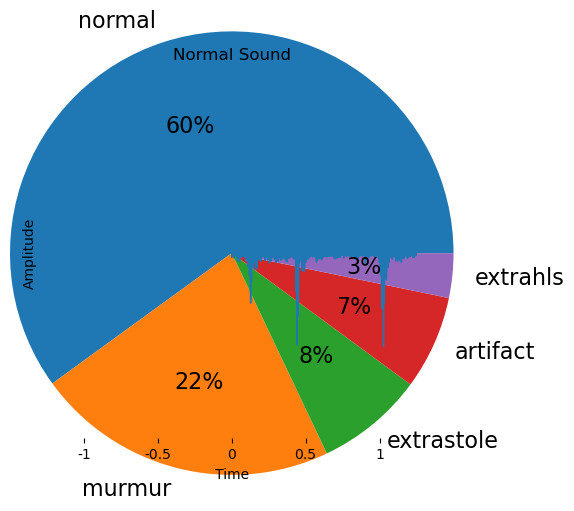

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [11]:

librosa.display.waveshow(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

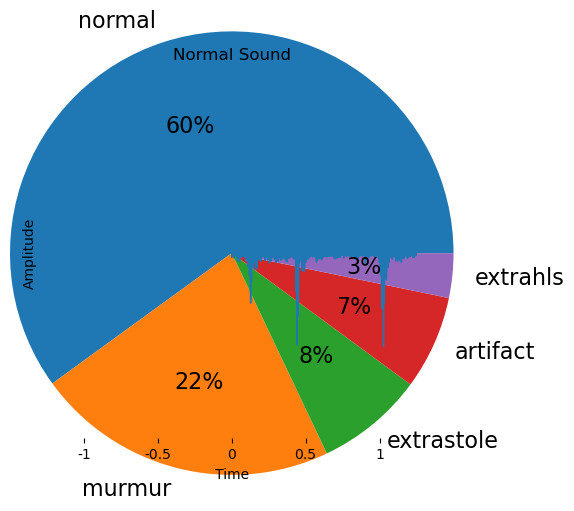

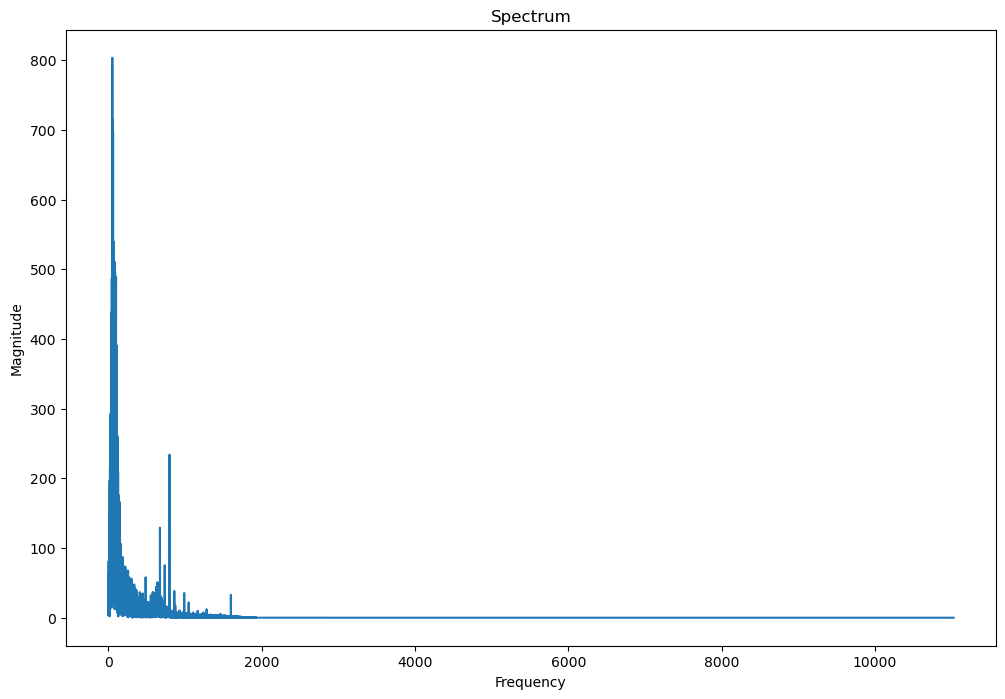

AttributeError: module 'matplotlib' has no attribute 'pyplot'

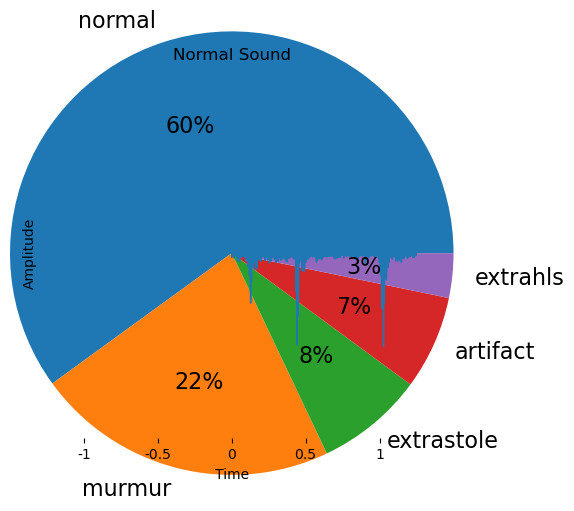

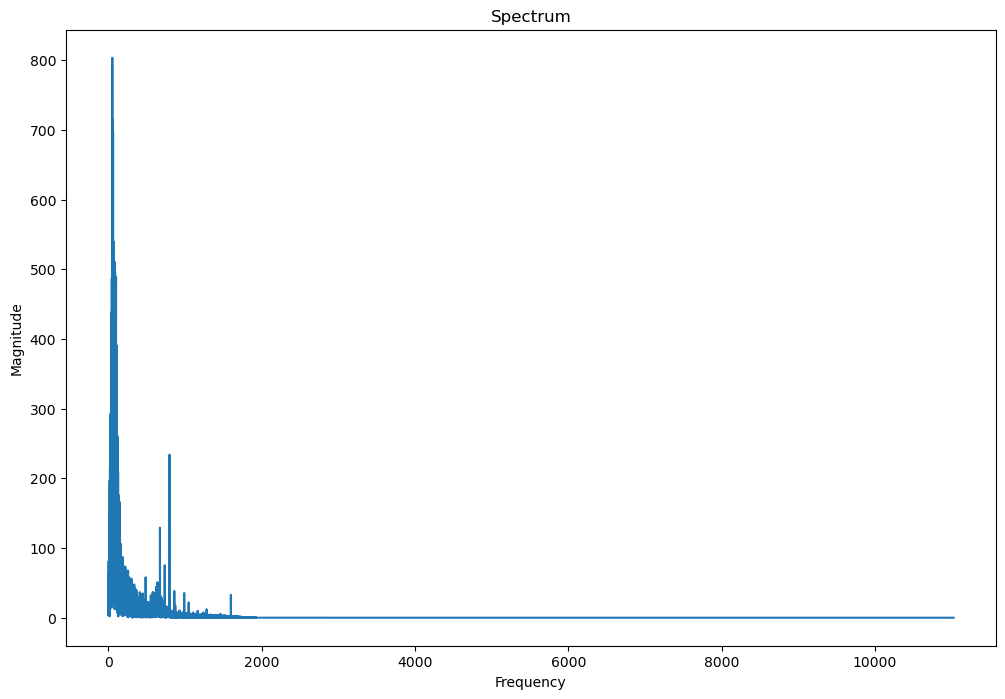

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [29]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [31]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

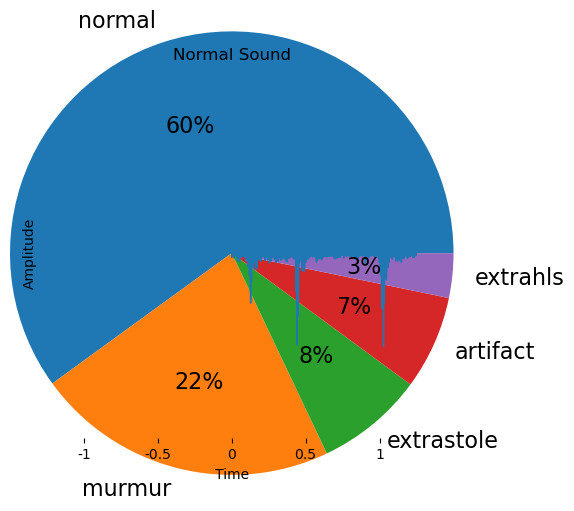

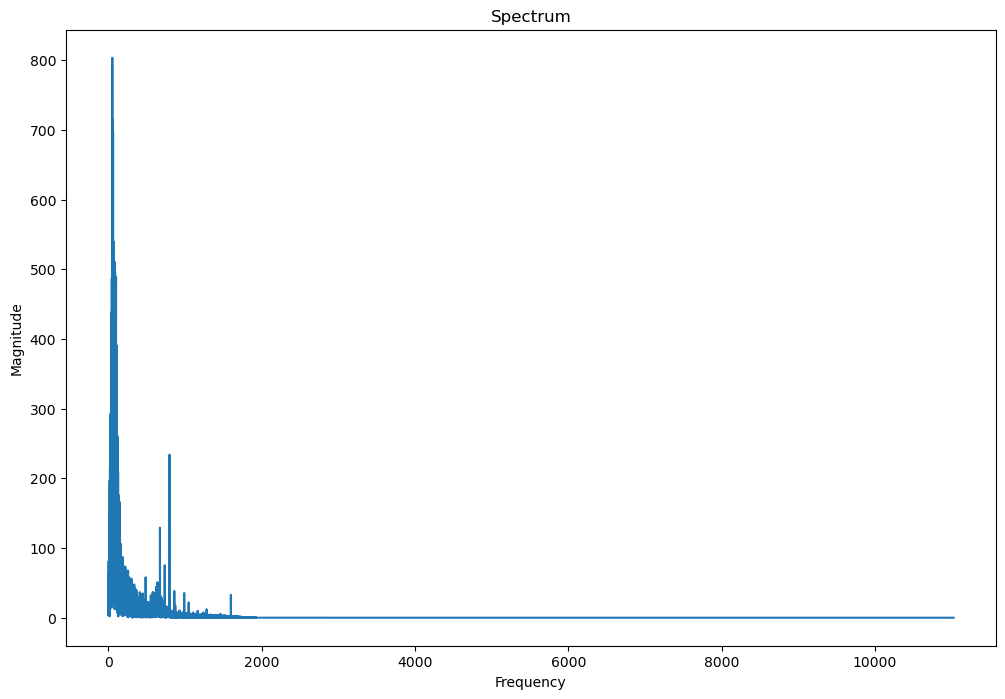

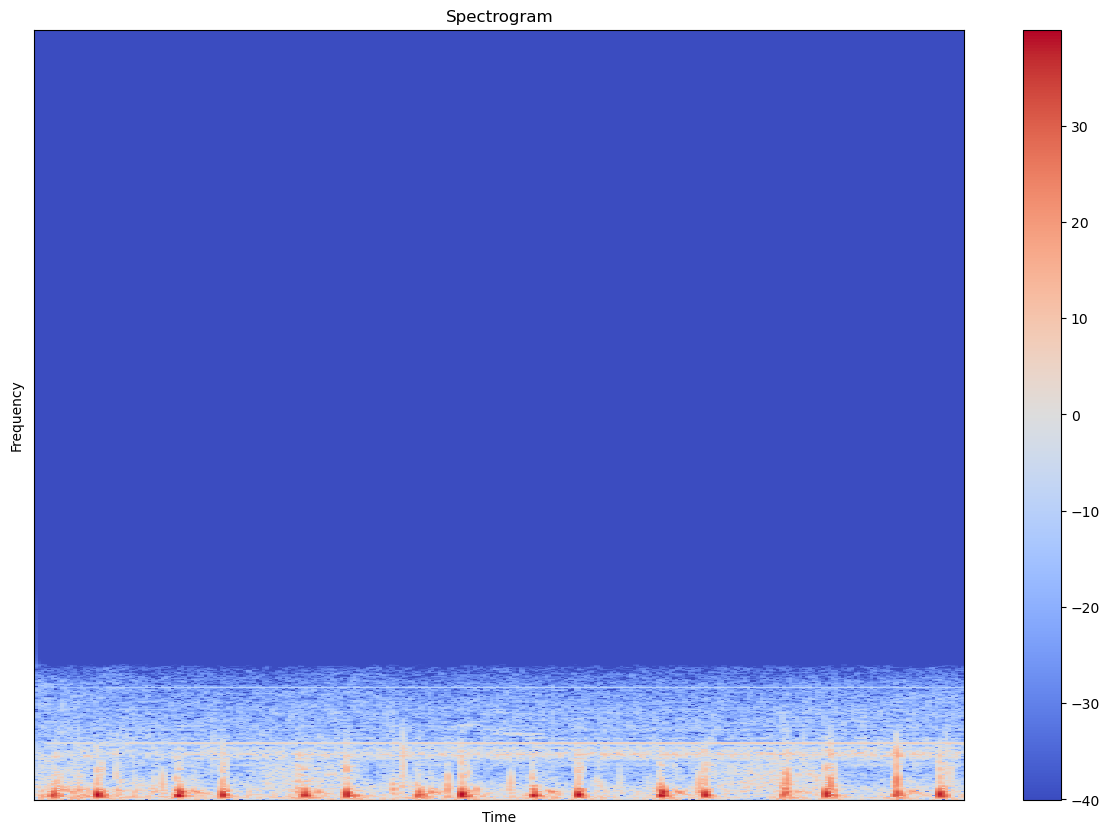

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [32]:
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

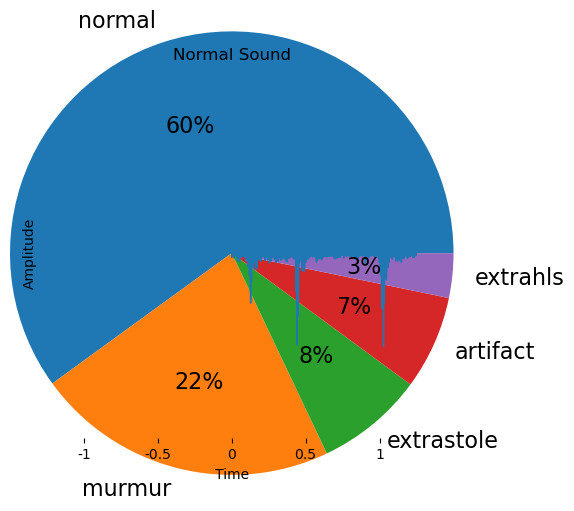

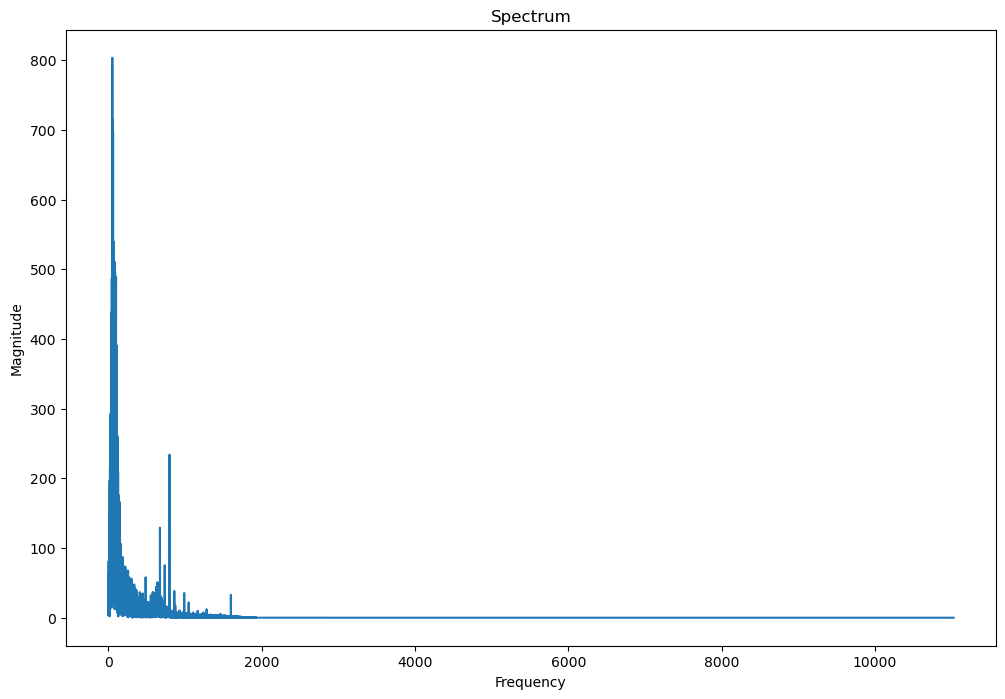

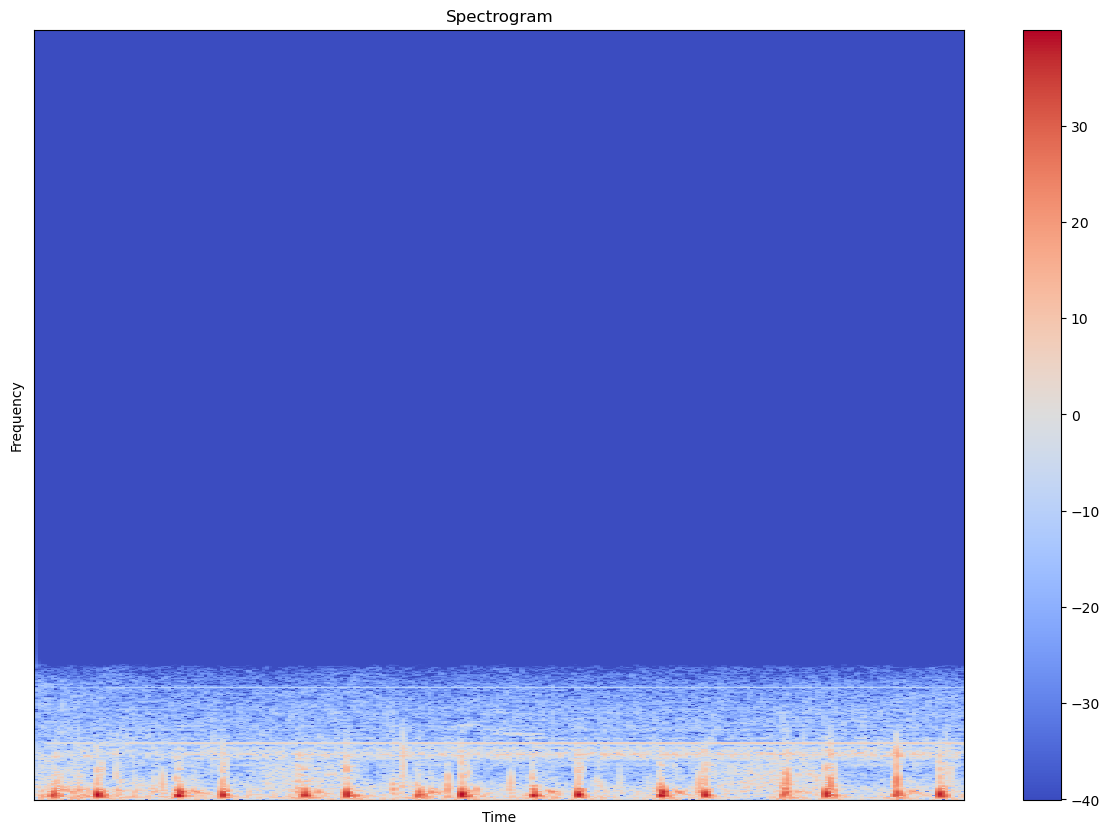

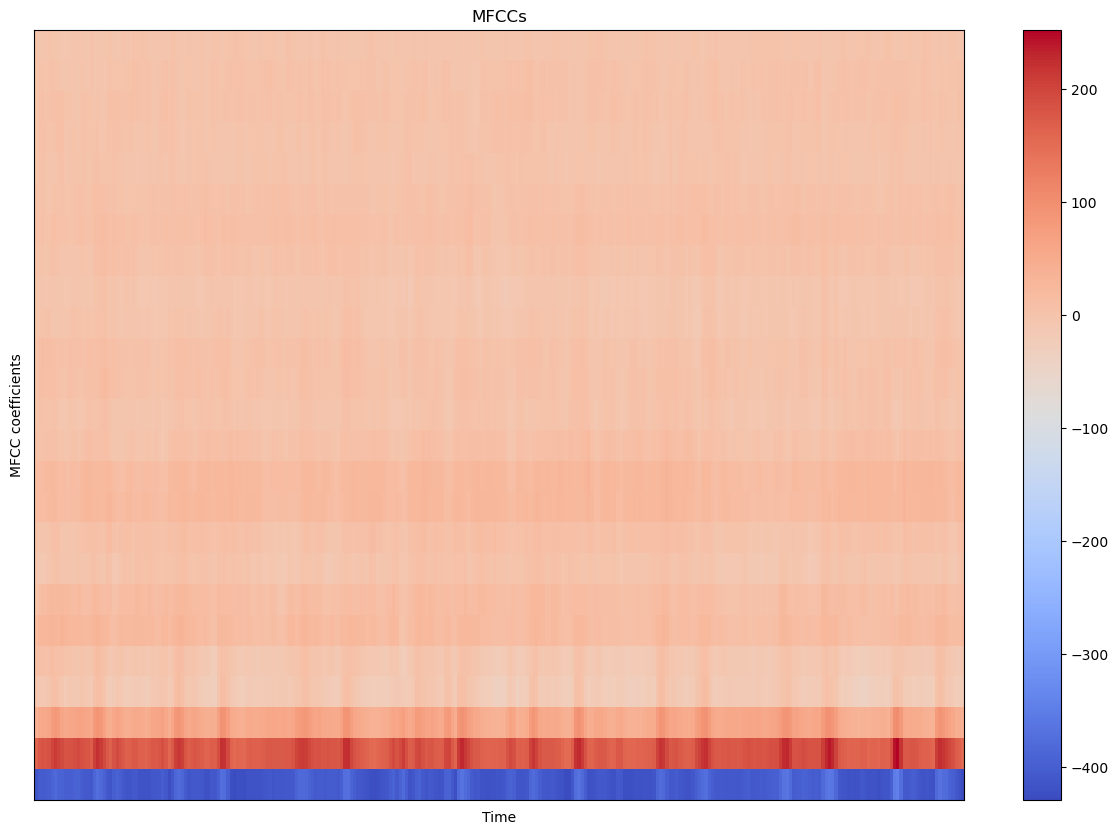

AttributeError: module 'matplotlib' has no attribute 'pyplot'

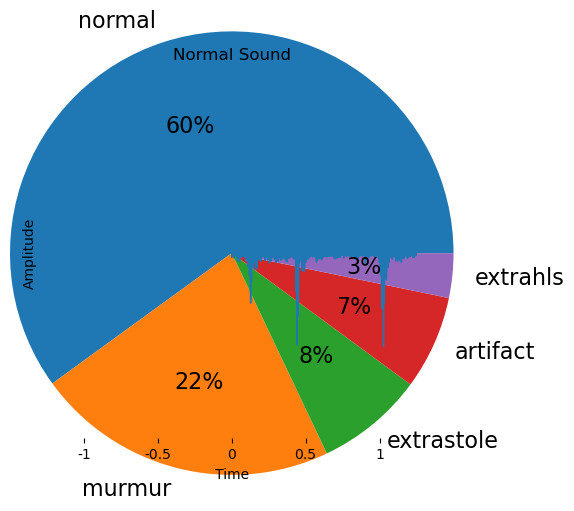

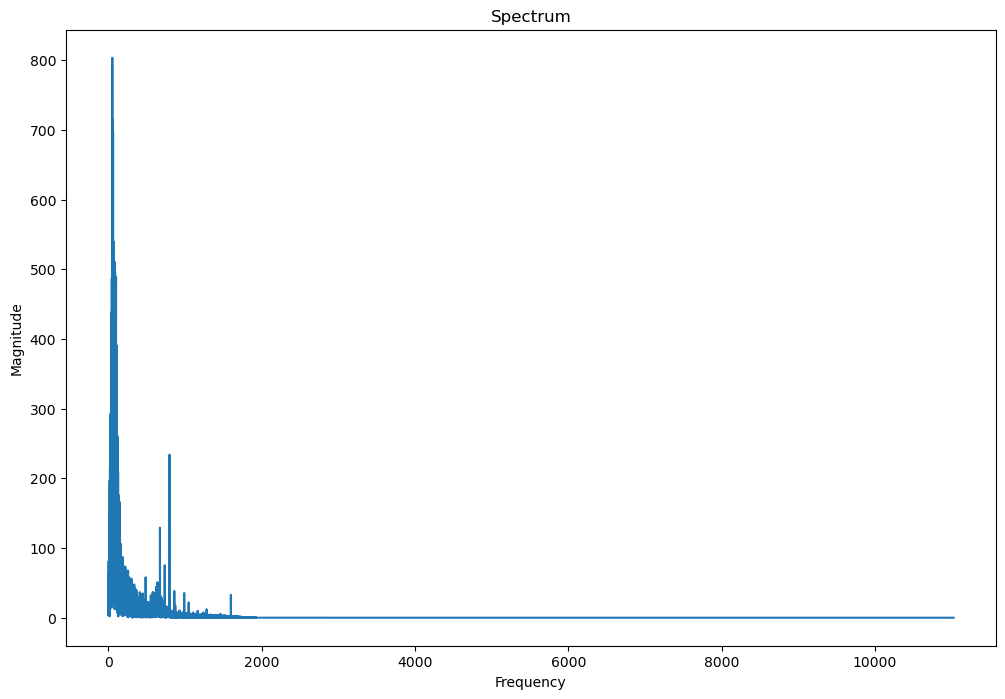

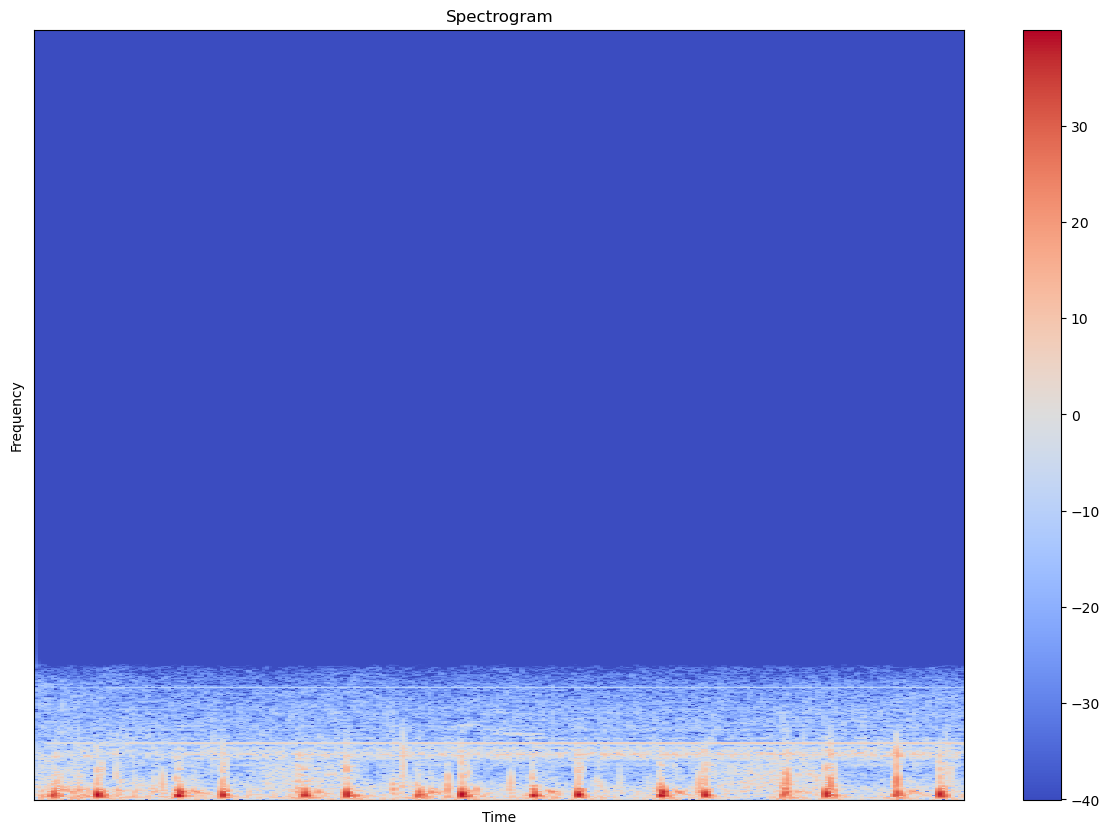

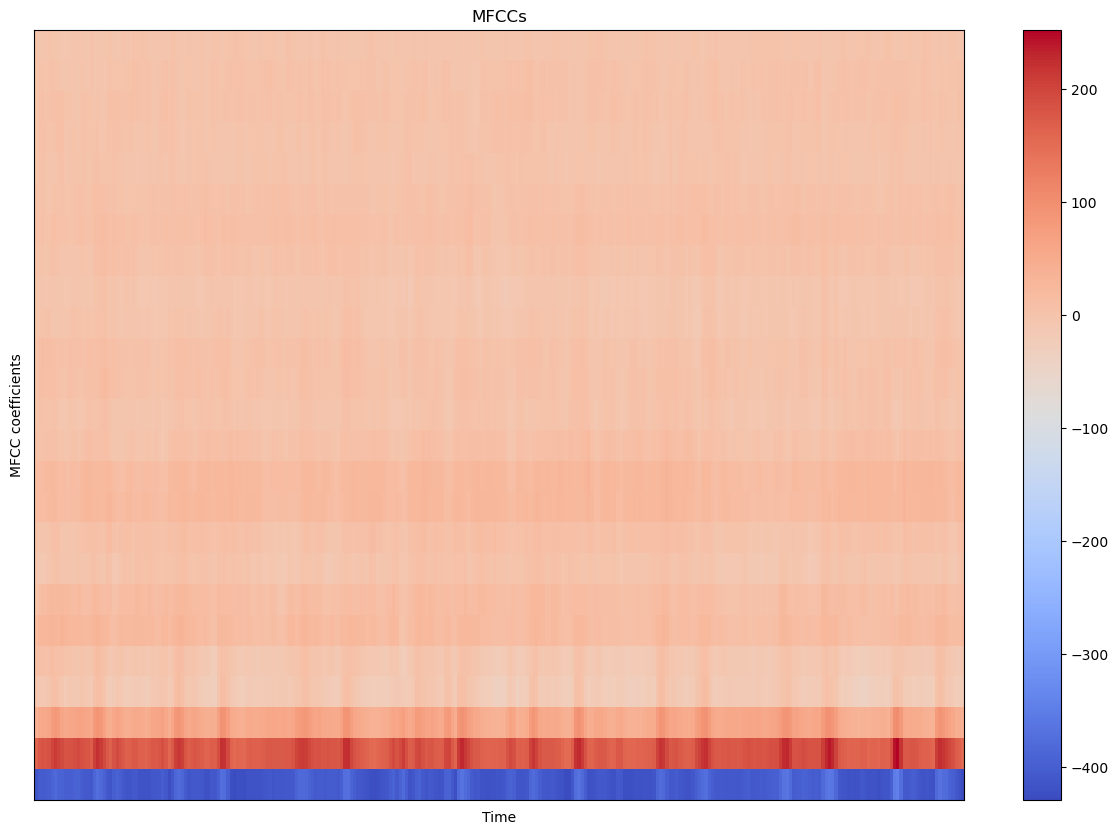

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [33]:
MFCCs = librosa.feature.mfcc(y = normal_sound_sample, sr = sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [34]:
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

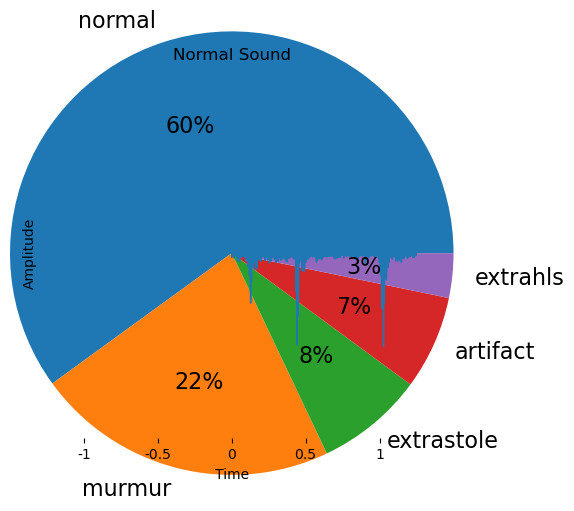

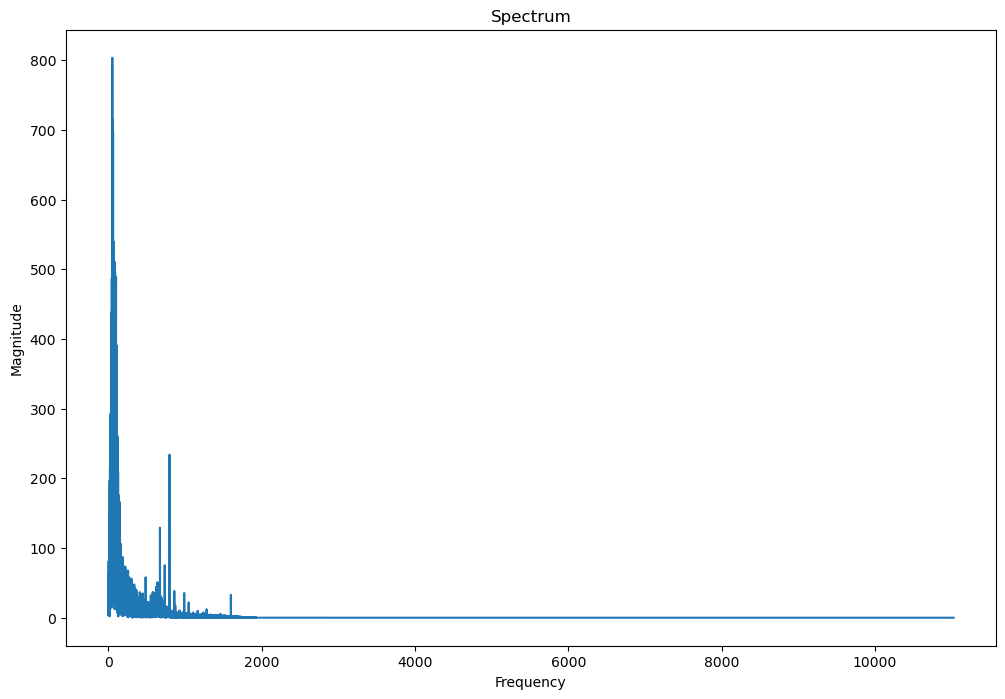

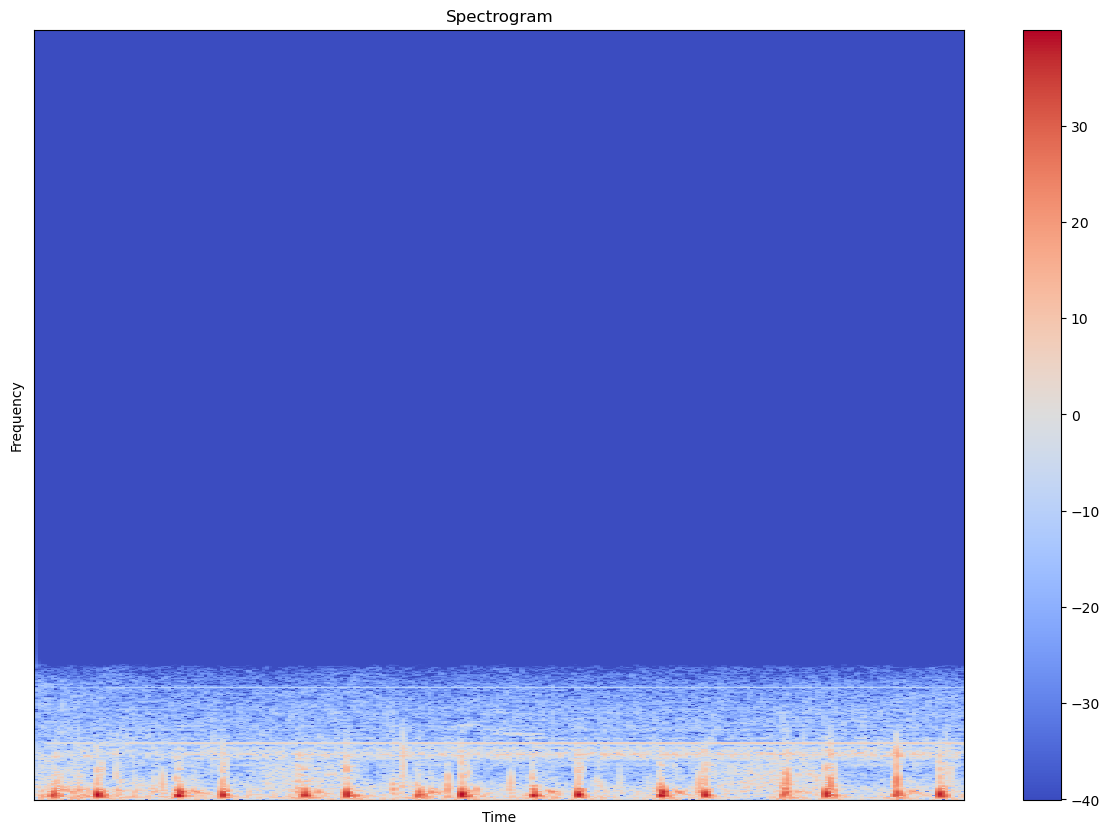

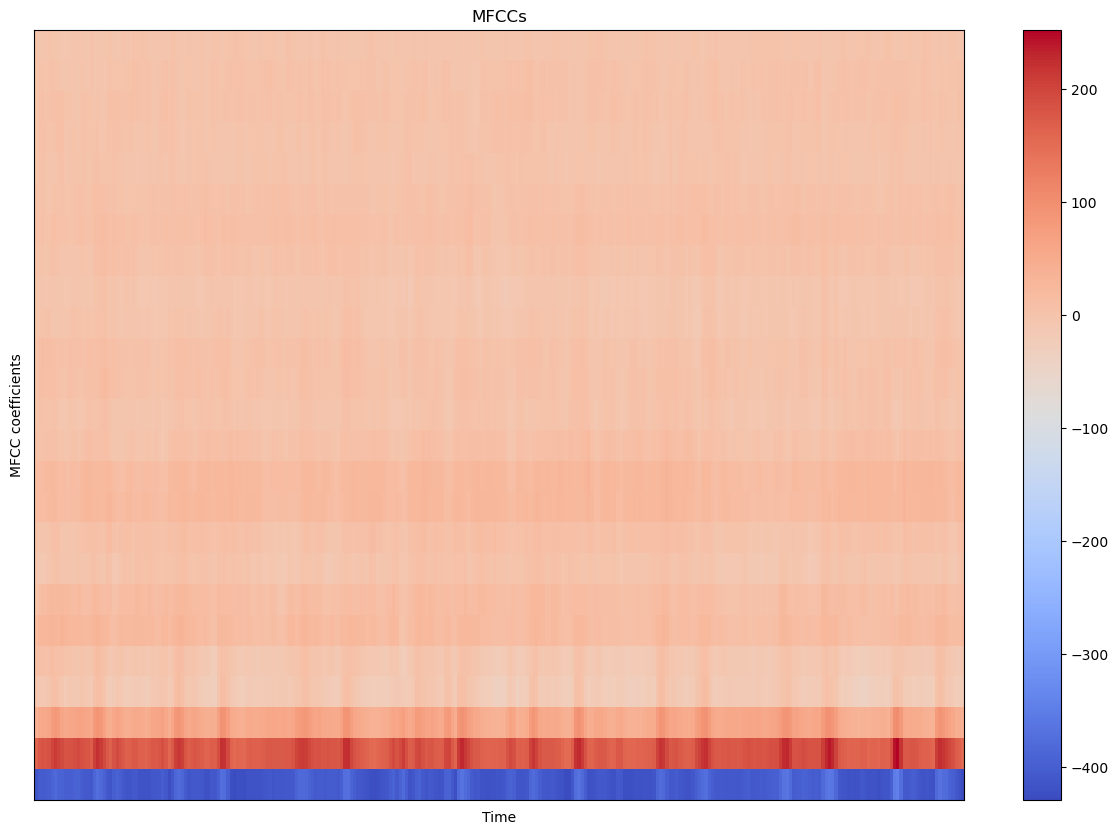

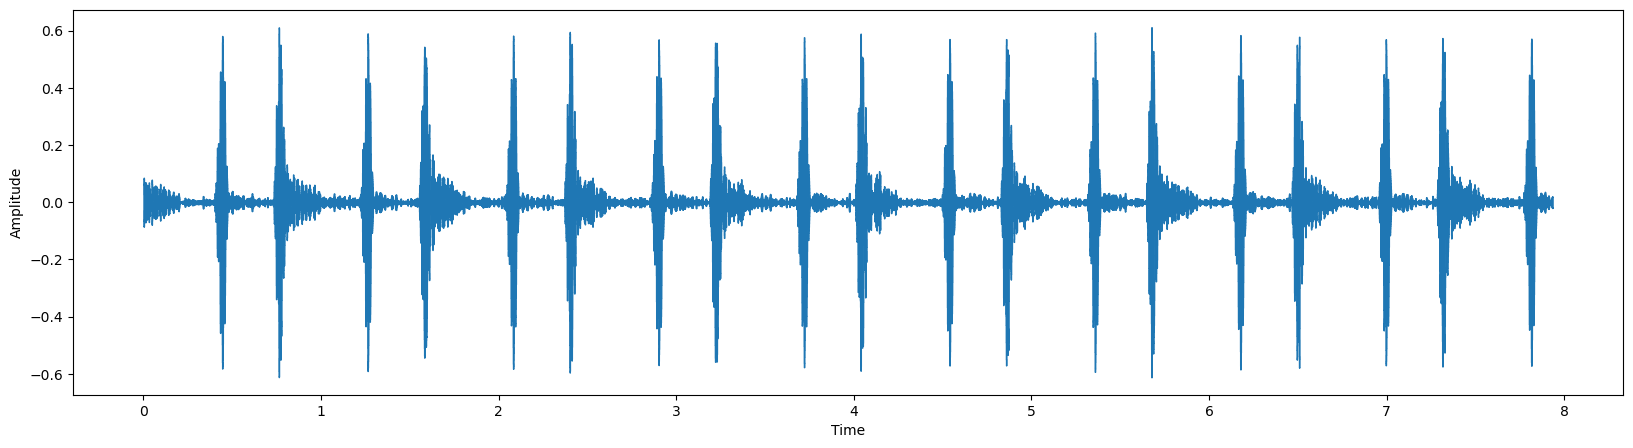

AttributeError: module 'matplotlib' has no attribute 'pyplot'

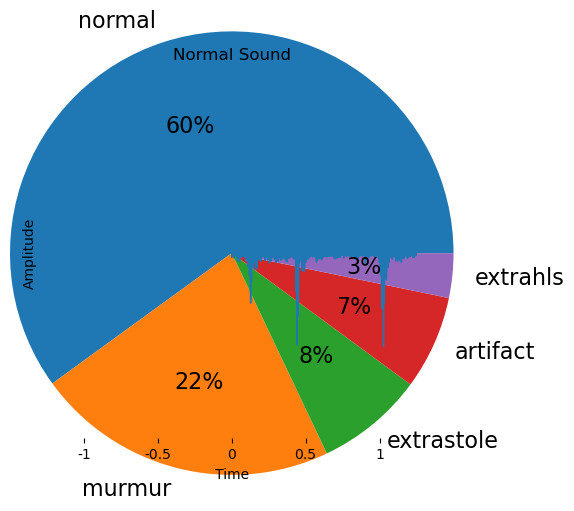

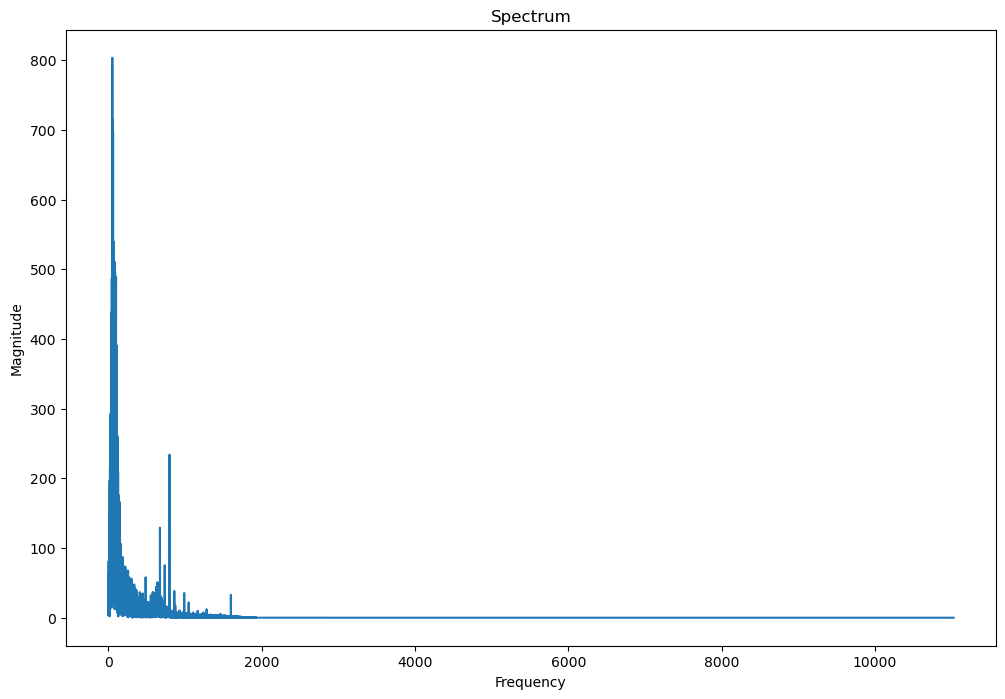

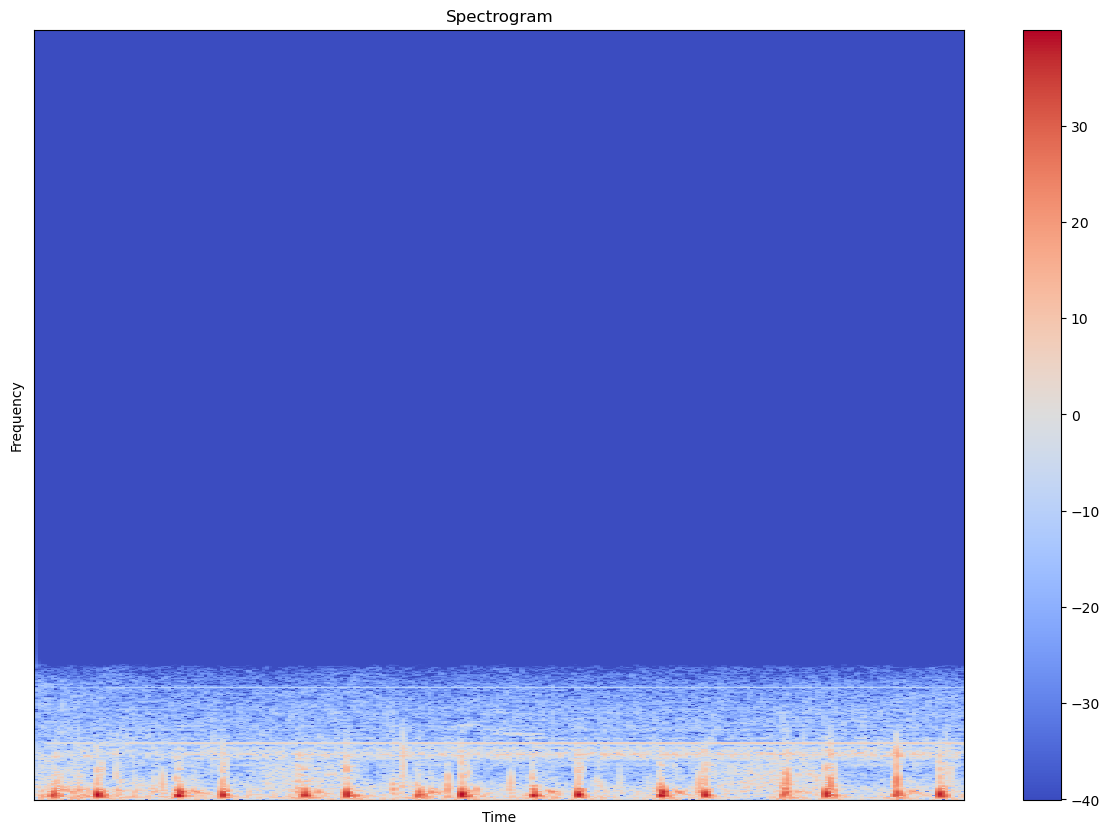

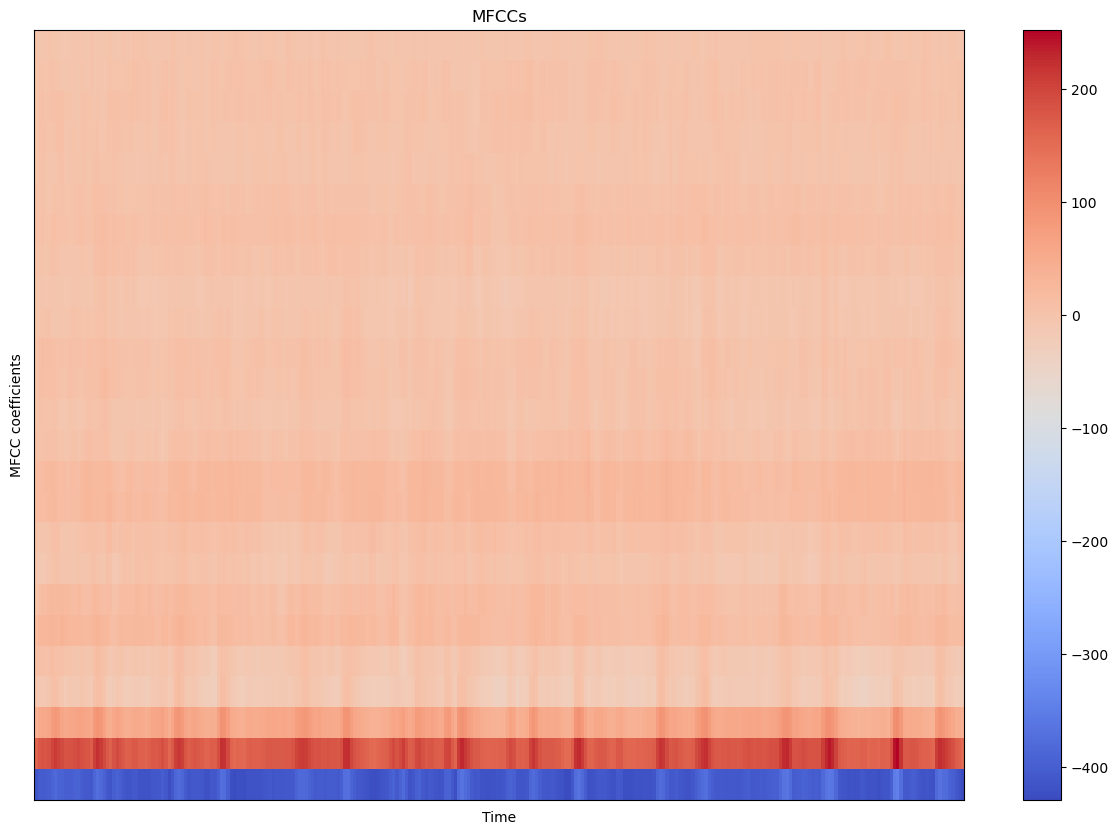

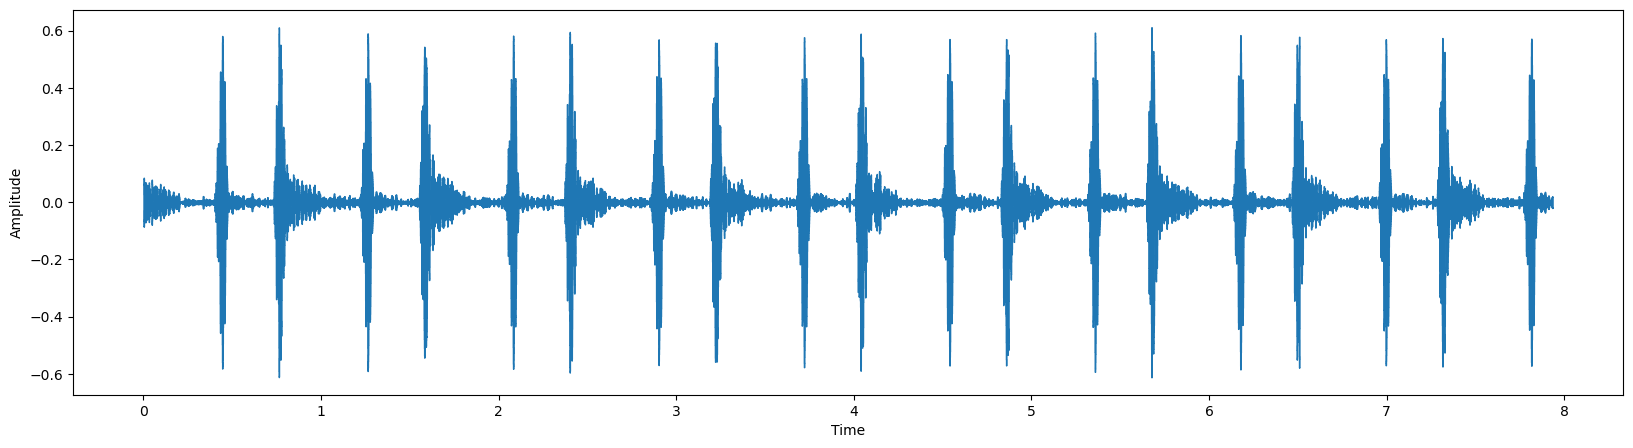

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [35]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

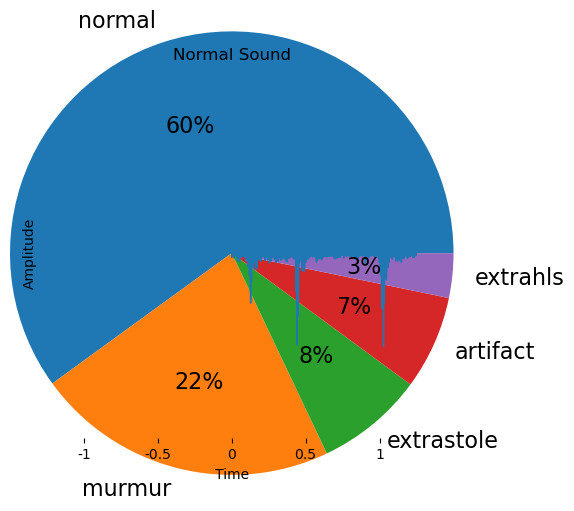

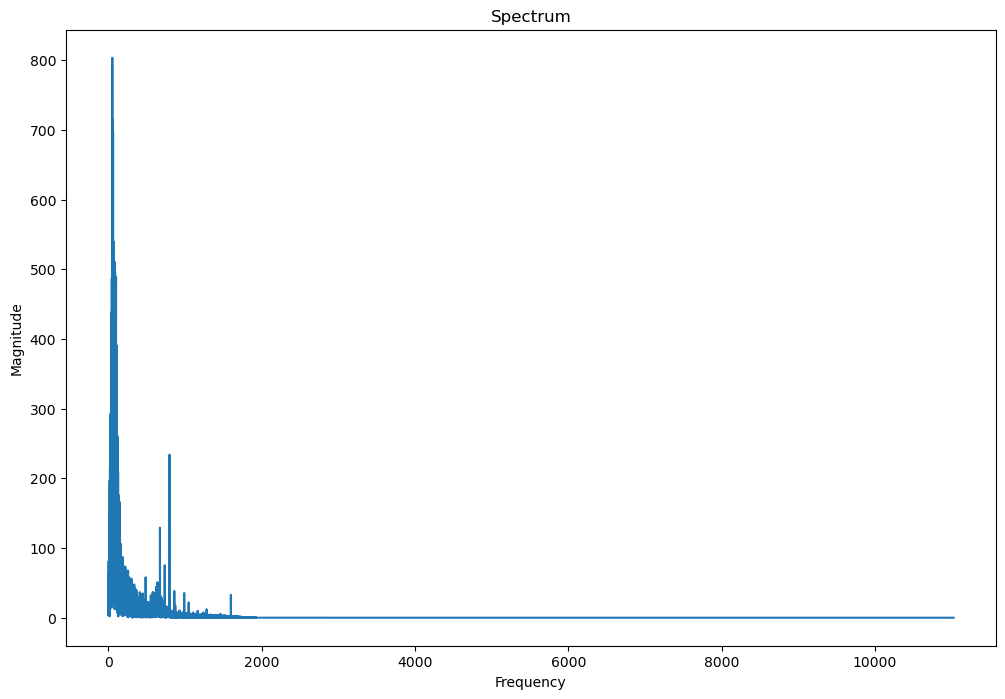

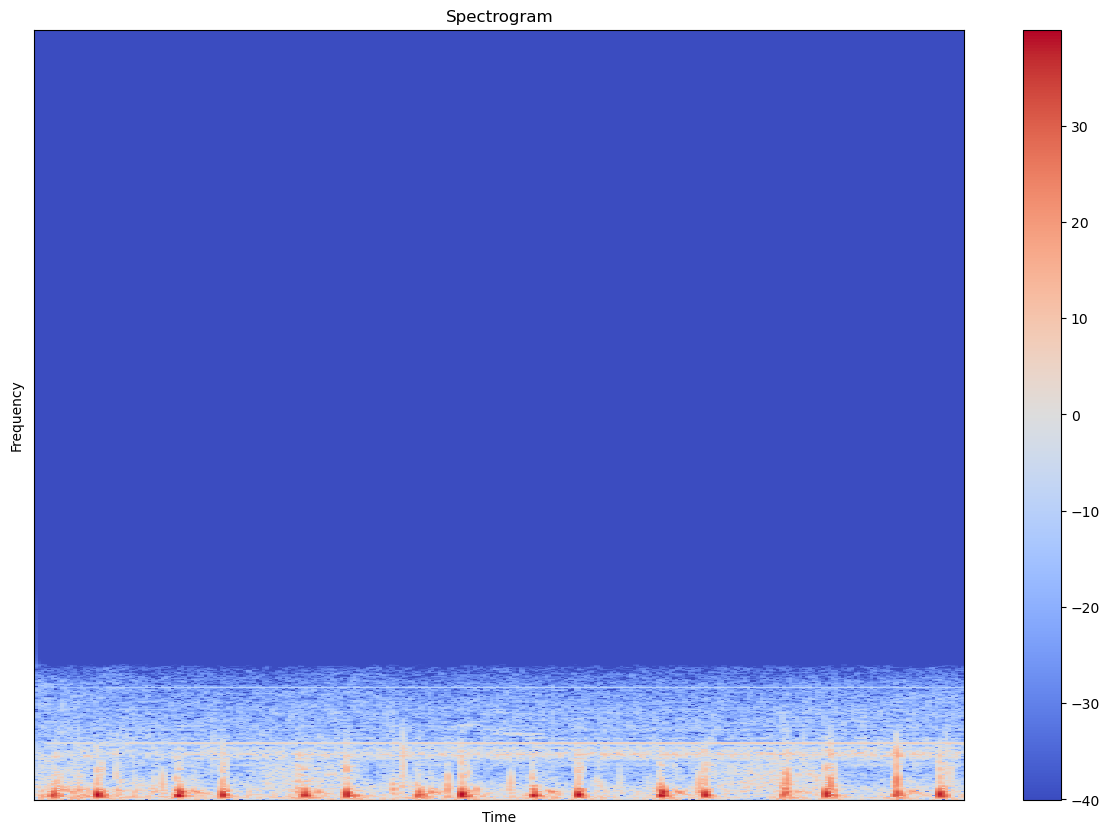

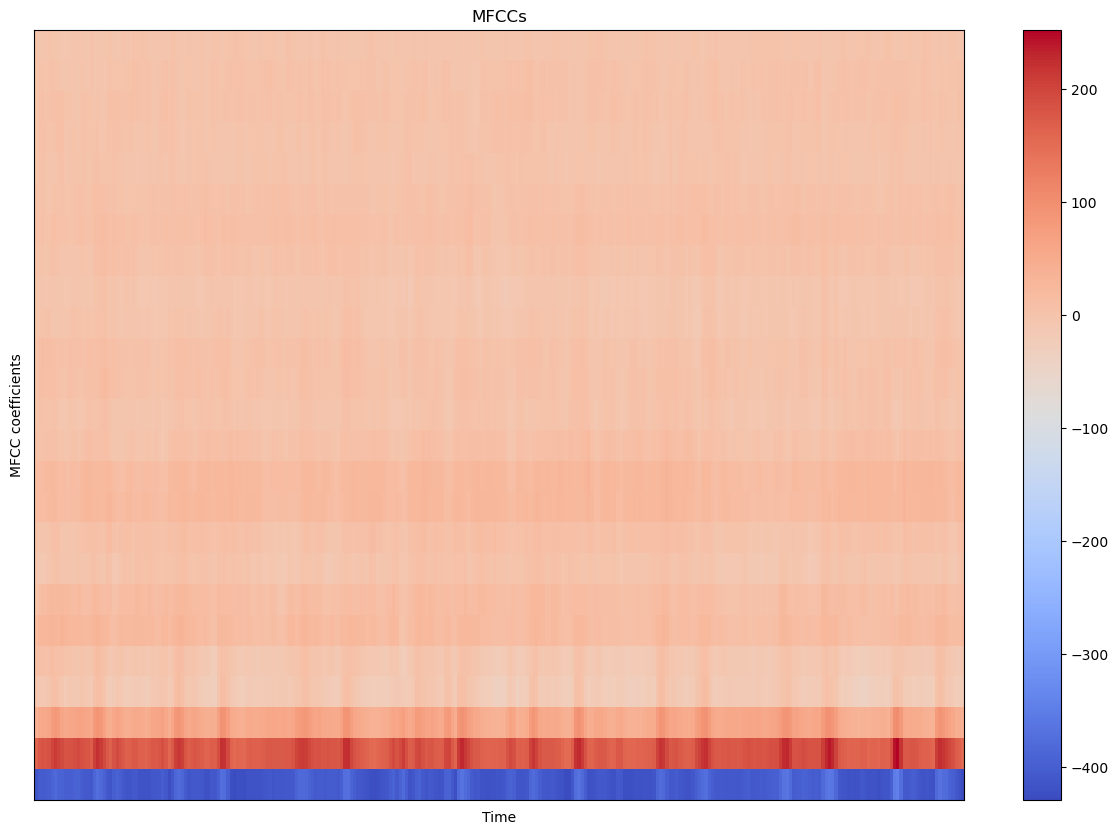

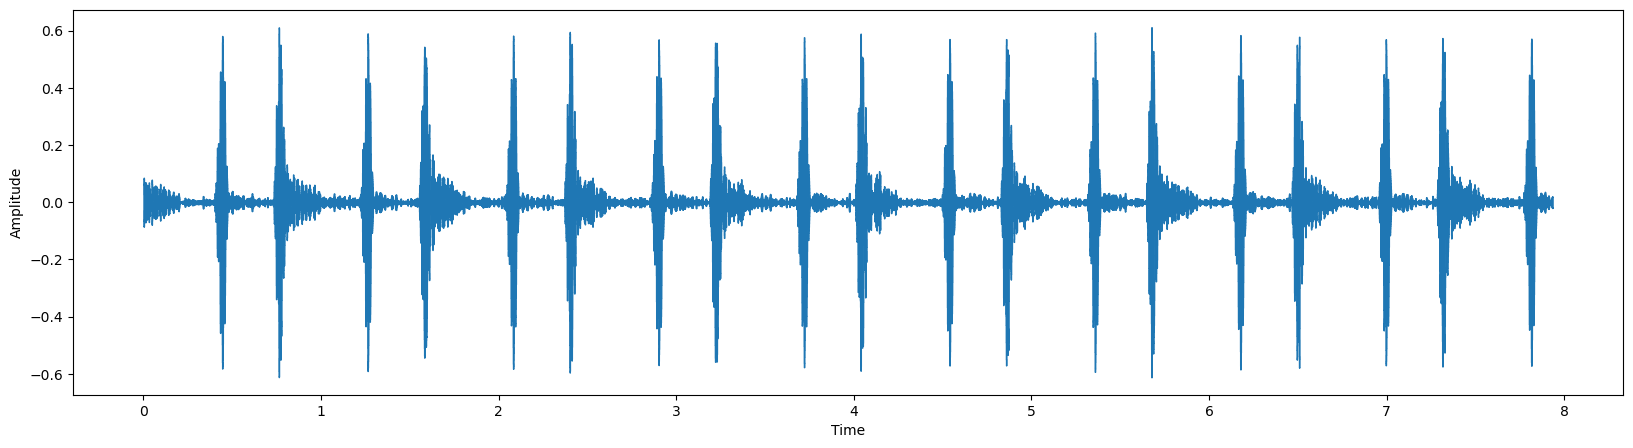

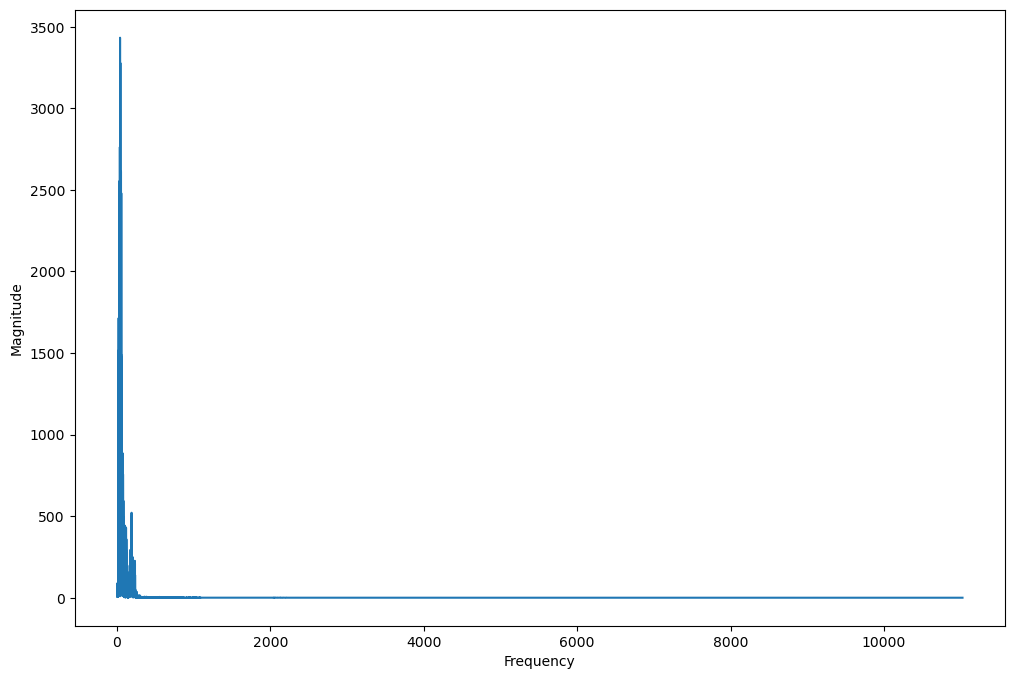

AttributeError: module 'matplotlib' has no attribute 'pyplot'

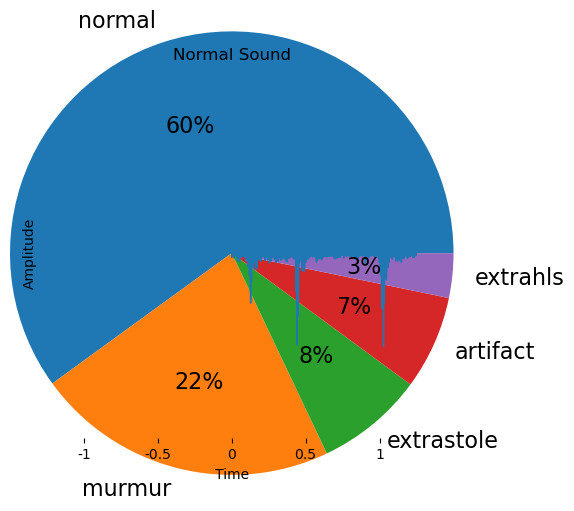

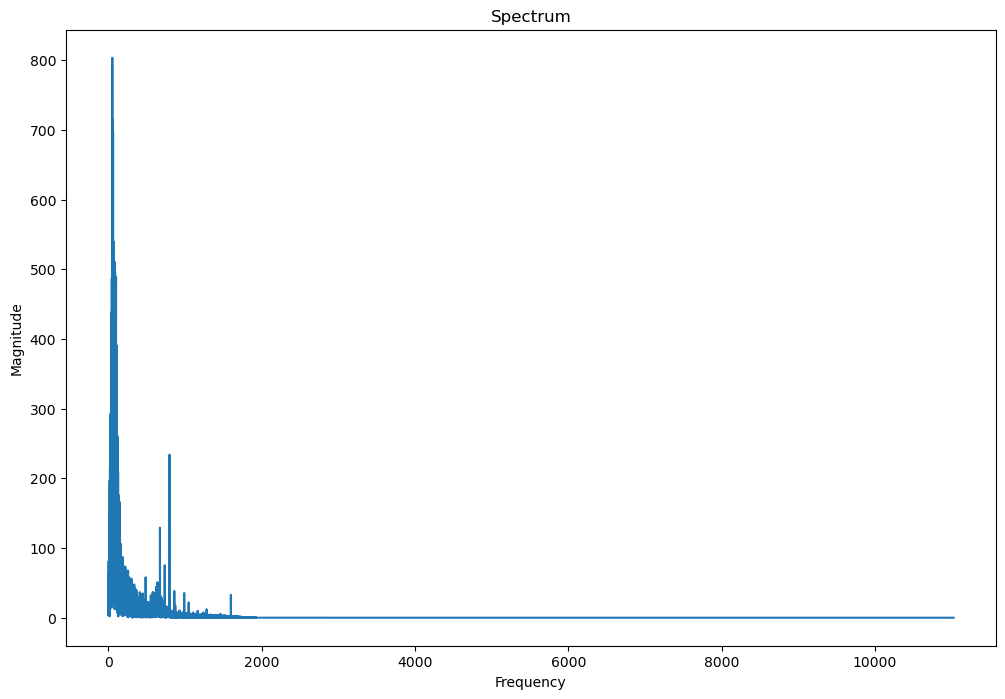

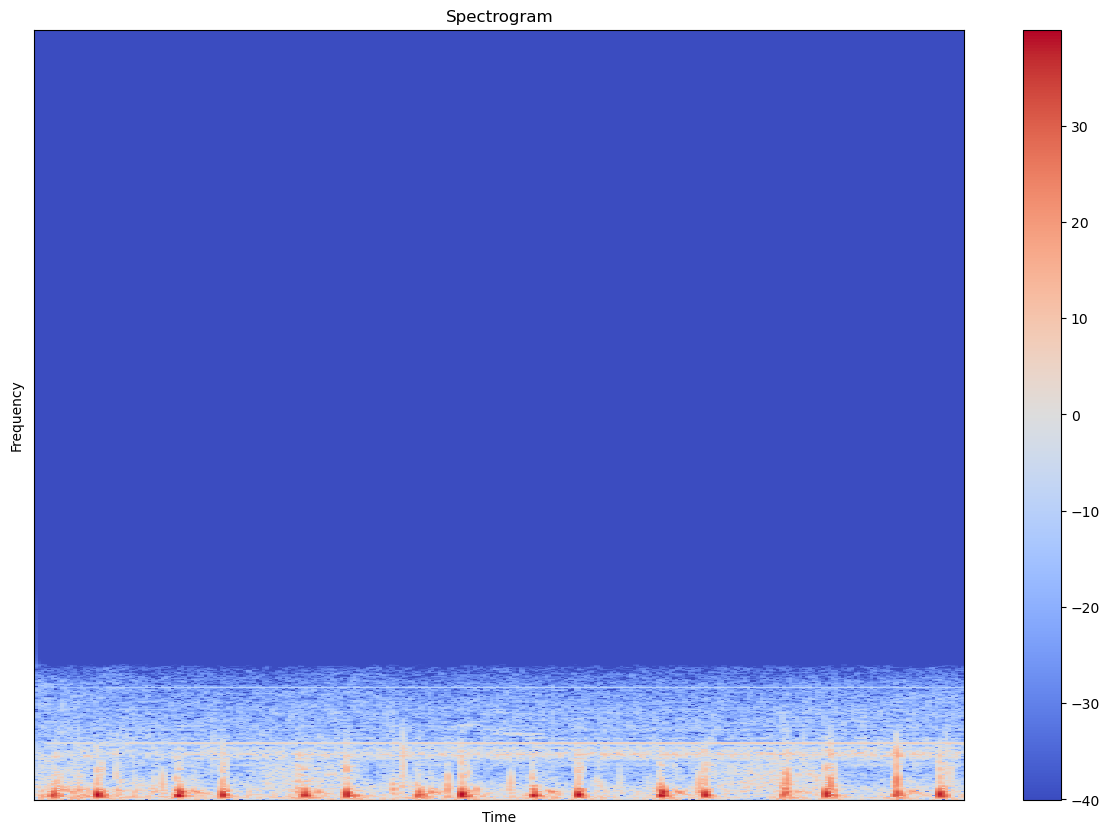

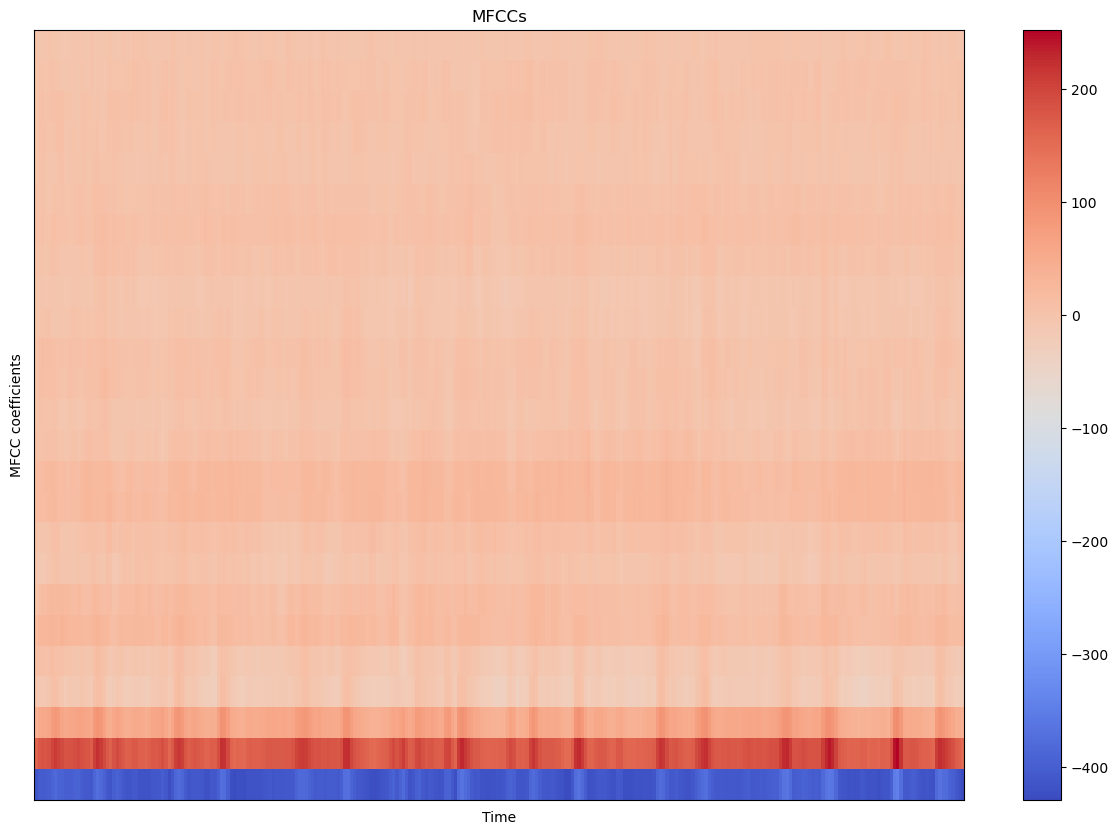

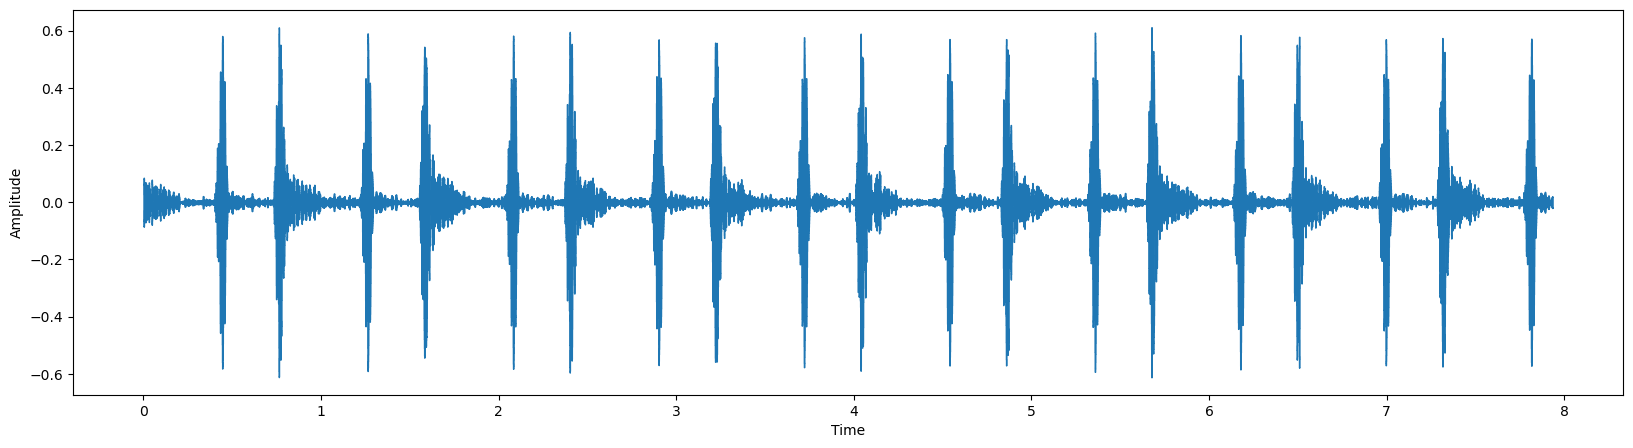

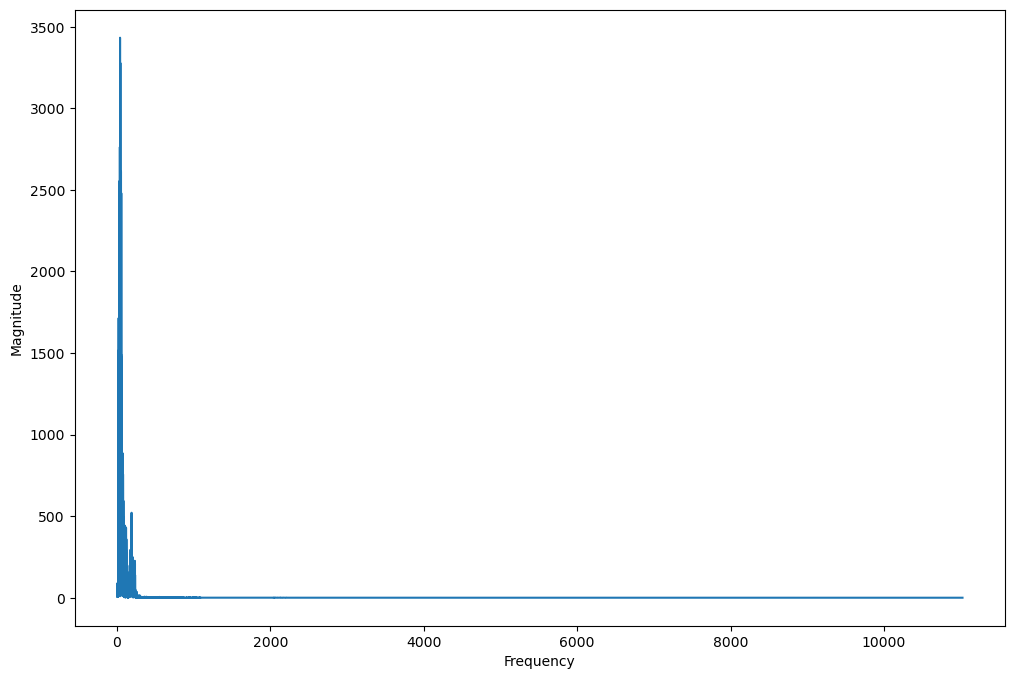

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [36]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [37]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

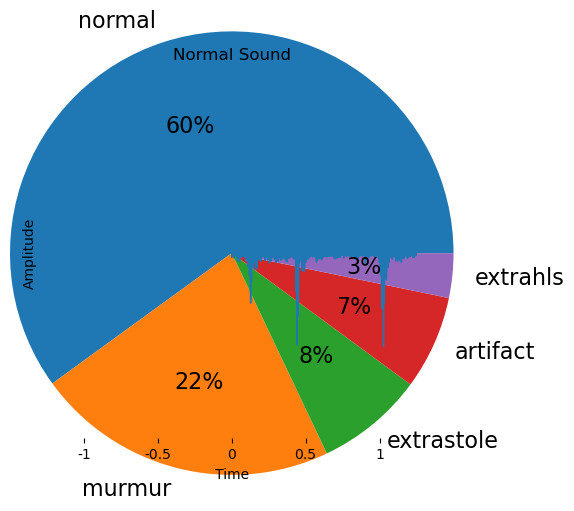

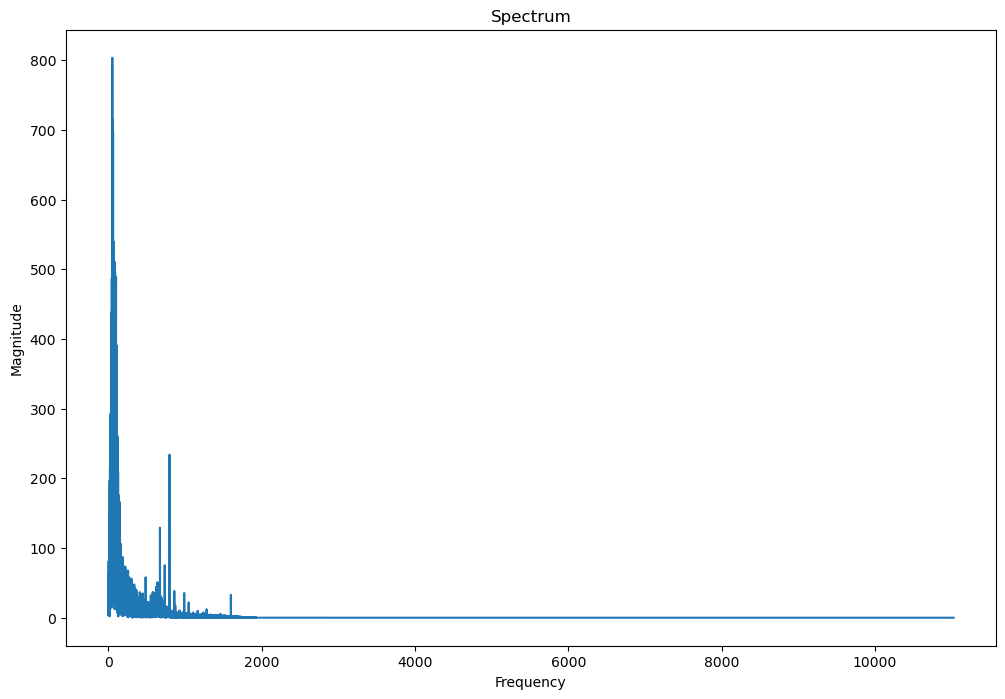

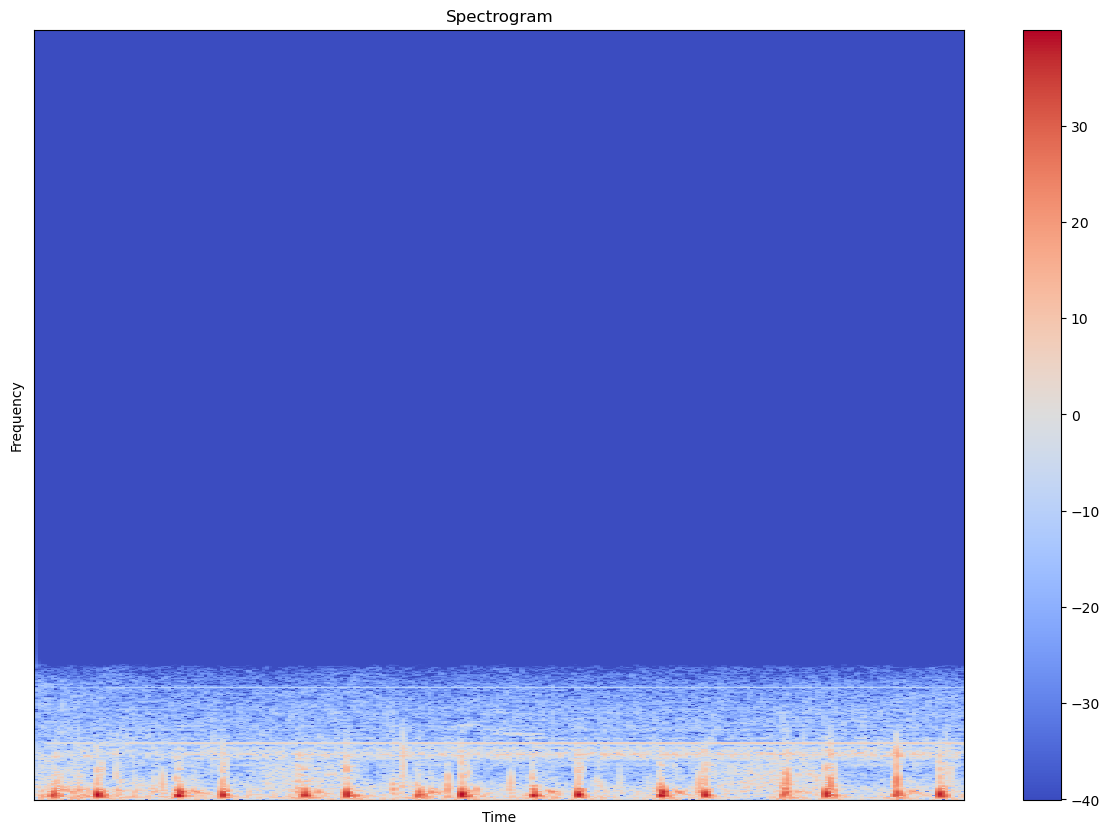

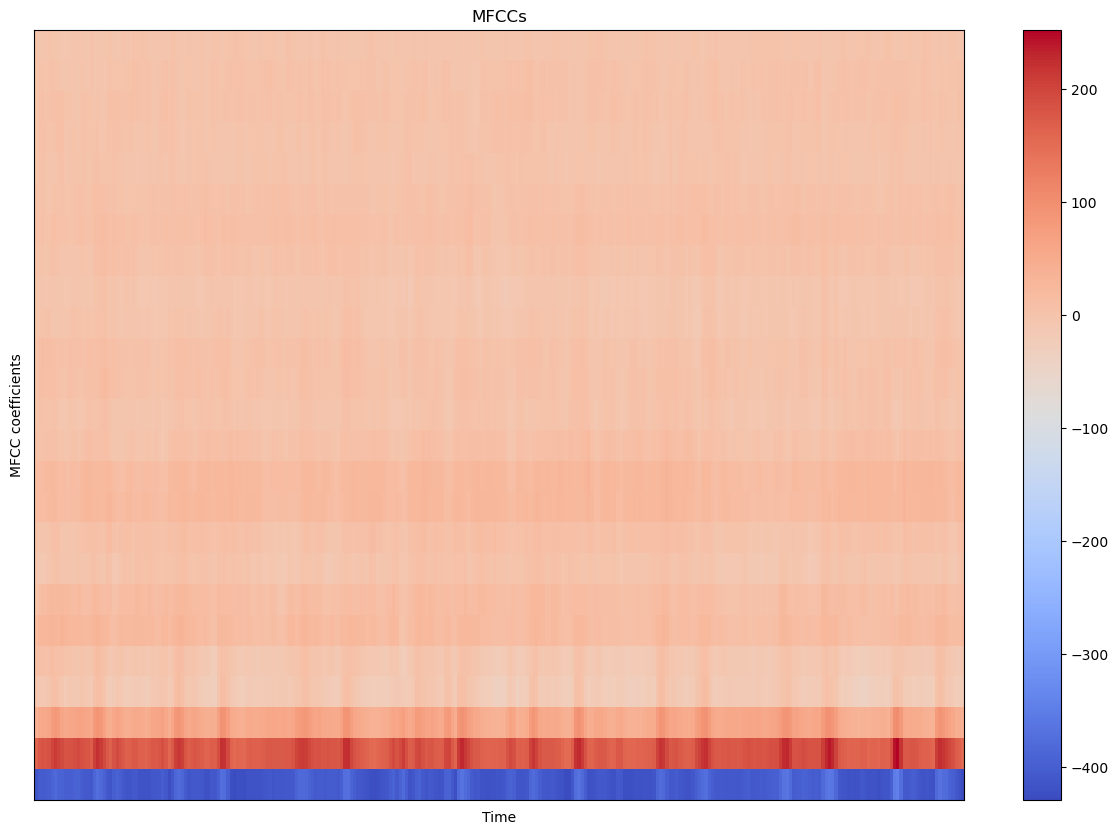

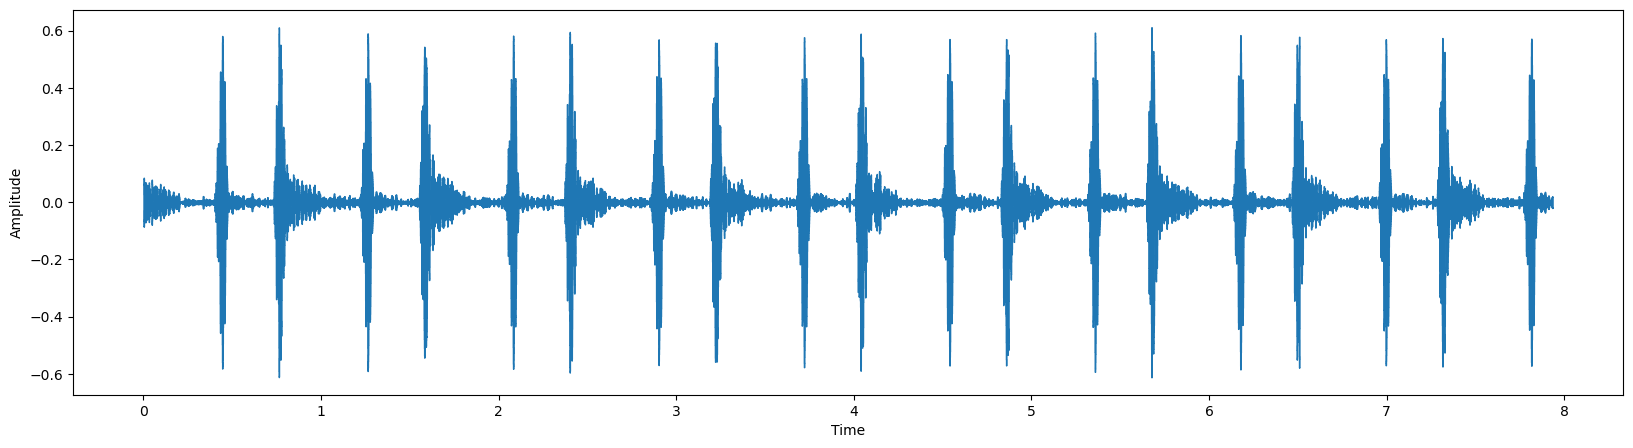

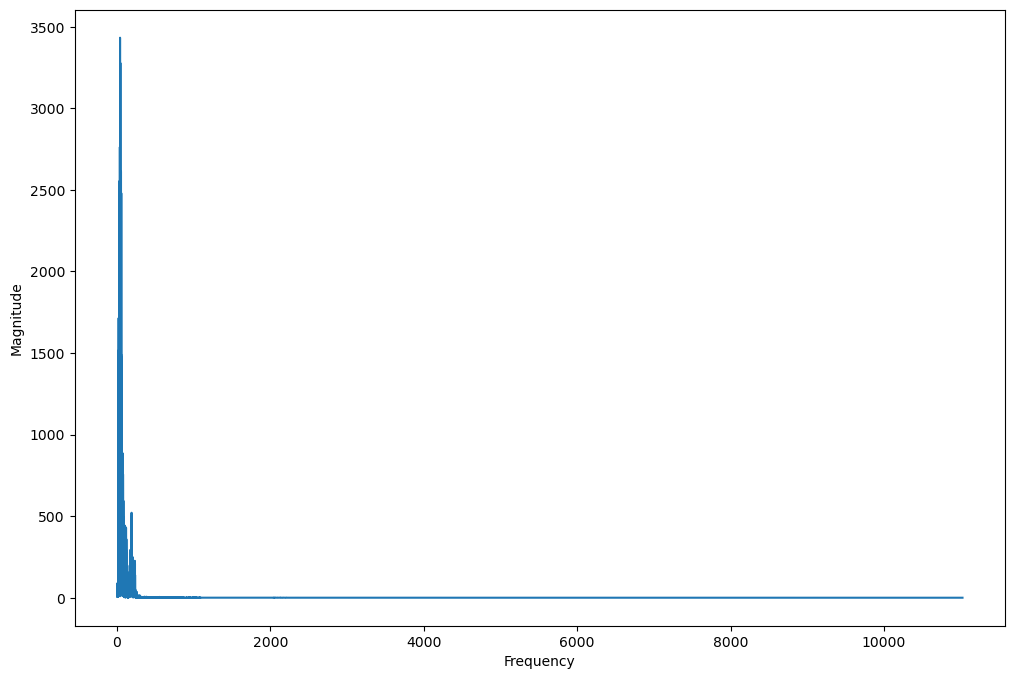

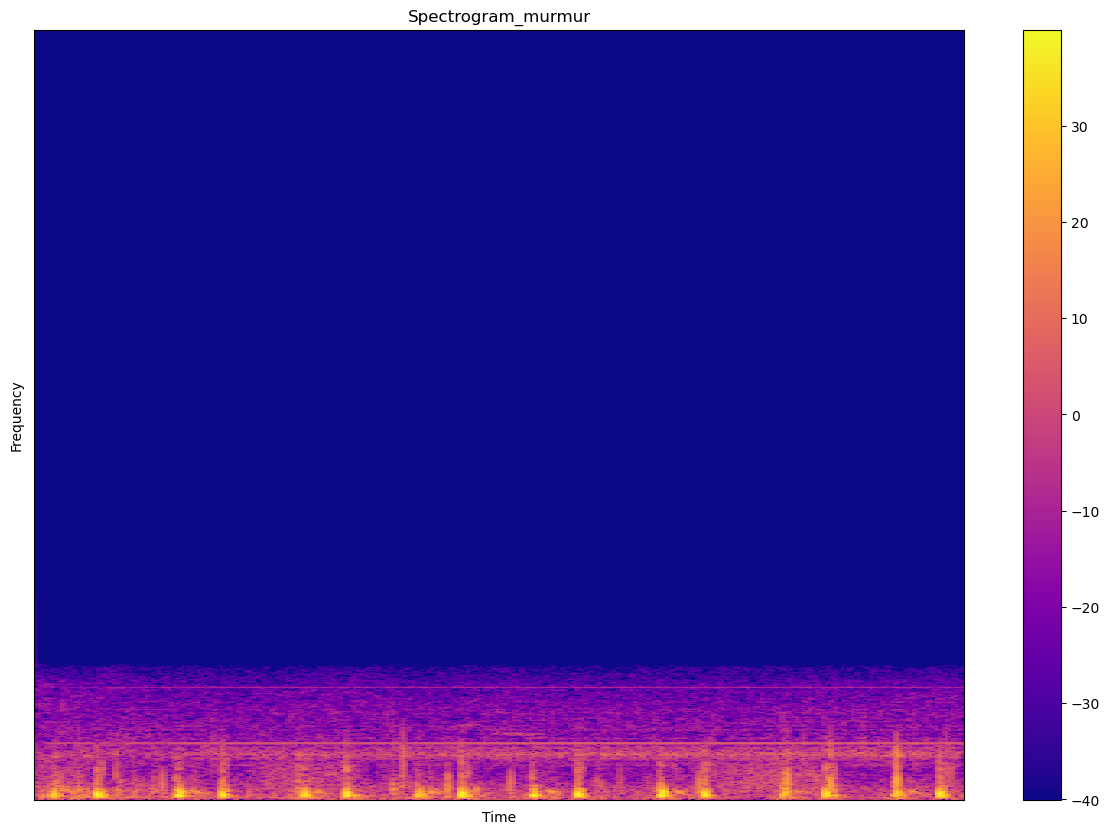

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [38]:
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

In [39]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, size = input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [41]:
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/artifact/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\Narender k Jain\Desktop\nsut pro

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_113_1306244002866_A.wav
fixing audio lenght : normal_noisynormal_113_1306244002866_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_113_1306244002866_B.wav
fixing audio lenght : normal_noisynormal_113_1306244002866_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_115_1306259437619_A1.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_A1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_115_1306259437619_B.wav
fixing audio lenght : normal_noisynormal_115_1306259437619_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_117_1306262456650_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_117_1306262456650_C.wav


load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_150_1306776340746_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_151_1306779785624_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_154_1306935608852_C.wav
fixing audio lenght : normal_noisynormal_154_1306935608852_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_155_1306935902813_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_155_1306935902813_C.wav
fixing audio lenght : normal_noisynormal_155_1306935902813_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_157_1306937583792_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal_noisynormal_157_1306937583792_B.wav
load file

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__106_1306776721273_D1.wav
fixing audio lenght : normal__106_1306776721273_D1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__106_1306776721273_D2.wav
fixing audio lenght : normal__106_1306776721273_D2.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__107_1305654946865_C1.wav
fixing audio lenght : normal__107_1305654946865_C1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__109_1305653646620_C.wav
fixing audio lenght : normal__109_1305653646620_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__113_1306244002866_D.wav
fixing audio lenght : normal__113_1306244002866_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__115_1306259437619_C.wav
fixing audio lenght : normal__115_1306259437619_C.wa

fixing audio lenght : normal__153_1306848820671_B1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__153_1306848820671_D1.wav
fixing audio lenght : normal__153_1306848820671_D1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__154_1306935608852_A1.wav
fixing audio lenght : normal__154_1306935608852_A1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__154_1306935608852_B.wav
fixing audio lenght : normal__154_1306935608852_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__154_1306935608852_B1.wav
fixing audio lenght : normal__154_1306935608852_B1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__154_1306935608852_D.wav
fixing audio lenght : normal__154_1306935608852_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__155_1306935902813_B1.

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__190_1308076920011_C1.wav
fixing audio lenght : normal__190_1308076920011_C1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__190_1308076920011_D.wav
fixing audio lenght : normal__190_1308076920011_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__191_1308077299430_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__194_1308139824187_A.wav
fixing audio lenght : normal__194_1308139824187_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__194_1308139824187_A1.wav
fixing audio lenght : normal__194_1308139824187_A1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__198_1308141739338_C.wav
fixing audio lenght : normal__198_1308141739338_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut proje

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__218_1308246311449_C1.wav
fixing audio lenght : normal__218_1308246311449_C1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__220_1308250132896_C.wav
fixing audio lenght : normal__220_1308250132896_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__220_1308250132896_D.wav
fixing audio lenght : normal__220_1308250132896_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__224_1308337157445_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__227_1308594233667_B.wav
fixing audio lenght : normal__227_1308594233667_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/normal/normal__227_1308594233667_C.wav
fixing audio lenght : normal__227_1308594233667_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project

fixing audio lenght : extrahls__201101160804.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201101160808.wav
fixing audio lenght : extrahls__201101160808.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201101161027.wav
fixing audio lenght : extrahls__201101161027.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201101241423.wav
fixing audio lenght : extrahls__201101241423.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201101241433.wav
fixing audio lenght : extrahls__201101241433.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201102070251.wav
fixing audio lenght : extrahls__201102070251.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/extrahls/extrahls__201102071835.wav
fixing audio lenght : extrahls__201102071835.wav
loa

In [42]:
murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]


extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_135_1306428972976_A.wav
fixing audio lenght : murmur_noisymurmur_135_1306428972976_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_135_1306428972976_B.wav
fixing audio lenght : murmur_noisymurmur_135_1306428972976_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_135_1306428972976_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_156_1306936373241_A.wav
fixing audio lenght : murmur_noisymurmur_156_1306936373241_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_156_1306936373241_B1.wav
fixing audio lenght : murmur_noisymurmur_156_1306936373241_B1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur_noisymurmur_160_1307100683334_D.wav


load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__197_1308141235553_C.wav
fixing audio lenght : murmur__197_1308141235553_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__197_1308141235553_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__200_1308144251434_C.wav
fixing audio lenght : murmur__200_1308144251434_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__200_1308144251434_D.wav
fixing audio lenght : murmur__200_1308144251434_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__201101051104.wav
fixing audio lenght : murmur__201101051104.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__201101051108.wav
fixing audio lenght : murmur__201101051108.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__276_1311162716489_C.wav
fixing audio lenght : murmur__276_1311162716489_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__281_1311165683454_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__281_1311165683454_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__281_1311165683454_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__287_1311170903290_C.wav
fixing audio lenght : murmur__287_1311170903290_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__288_1311164615284_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/murmur/murmur__292_1311185449649_B.wav
fixing audio lenght : murmur__292_1311185449649_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut proje

In [43]:
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__101_1305030823364_F.wav
fixing audio lenght : Bunlabelledtest__101_1305030823364_F.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_A.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__103_1305031931979_C.wav
fixing audio lenght : Bunlabelledtest__103_1305031931979_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__105_1305033453095_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabe

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__144_1306522408528_A.wav
fixing audio lenght : Bunlabelledtest__144_1306522408528_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__145_1307987561278_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__145_1307987561278_D.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__146_1306778707532_C.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__146_1306778707532_D31.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_D31.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__147_1306523973811_D.wav
fixing audio lenght : Bunlabelledtest__147_1306523973811_D.wav
load file  C

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__186_1308073648738_C.wav
fixing audio lenght : Bunlabelledtest__186_1308073648738_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__186_1308073648738_D1.wav
fixing audio lenght : Bunlabelledtest__186_1308073648738_D1.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__187_1308073994223_C.wav
fixing audio lenght : Bunlabelledtest__187_1308073994223_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__189_1308075231945_A.wav
fixing audio lenght : Bunlabelledtest__189_1308075231945_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__189_1308075231945_C.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__191_1308077299430_C.wav
load file  C:\

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__254_1309350589009_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__255_1309351210897_B.wav
fixing audio lenght : Bunlabelledtest__255_1309351210897_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__259_1309352630271_B.wav
fixing audio lenght : Bunlabelledtest__259_1309352630271_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__260_1309353164458_A.wav
fixing audio lenght : Bunlabelledtest__260_1309353164458_A.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__262_1309355283807_B.wav
fixing audio lenght : Bunlabelledtest__262_1309355283807_B.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Bunlabelledtest__264_1309356143724_A.wav
load file  C:\Us

load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106061104.wav
fixing audio lenght : Aunlabelledtest__201106061104.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106061215.wav
fixing audio lenght : Aunlabelledtest__201106061215.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106100606.wav
fixing audio lenght : Aunlabelledtest__201106100606.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106111419.wav
fixing audio lenght : Aunlabelledtest__201106111419.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106120928.wav
fixing audio lenght : Aunlabelledtest__201106120928.wav
load file  C:\Users\Narender k Jain\Desktop\nsut project\Heartbeat_Sound/unlabel/Aunlabelledtest__201106130440.wav
fixing audio lenght : Aunlabel

In [44]:
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [45]:
x_data.shape

(585, 25, 1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [47]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 25, 256)          133120    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 25, 128)           32896     
                                                                 
 dropout_1 (Dropout)         (None, 25, 128)           0         
                                                                 
 dense_6 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_7 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_8 (Dense)             (None, 25, 64)            4160      
                                                      

In [50]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [52]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/30
125/125 [==============================] - 14s 66ms/step - loss: 0.8297 - acc: 0.5401 - val_loss: 0.7877 - val_acc: 0.3298 - lr: 0.0010
Epoch 2/30
125/125 [==============================] - 7s 59ms/step - loss: 0.6174 - acc: 0.5668 - val_loss: 0.5808 - val_acc: 0.7660 - lr: 8.0000e-04
Epoch 3/30
125/125 [==============================] - 9s 73ms/step - loss: 0.5453 - acc: 0.6203 - val_loss: 0.7196 - val_acc: 0.4362 - lr: 6.4000e-04
Epoch 4/30
125/125 [==============================] - 8s 65ms/step - loss: 0.4988 - acc: 0.6898 - val_loss: 0.5325 - val_acc: 0.7660 - lr: 5.1200e-04
Epoch 5/30
125/125 [==============================] - 9s 69ms/step - loss: 0.5110 - acc: 0.6872 - val_loss: 0.5358 - val_acc: 0.7447 - lr: 4.0960e-04
Epoch 6/30
125/125 [==============================] - 9s 75ms/step - loss: 0.4586 - acc: 0.7193 - val_loss: 0.5524 - val_acc: 0.7766 - lr: 3.2768e-04
Epoch 7/30
125/125 [==============================] - 9s 73ms/step - loss: 0.4541 - acc: 0.7380 - val_l

<AxesSubplot:>

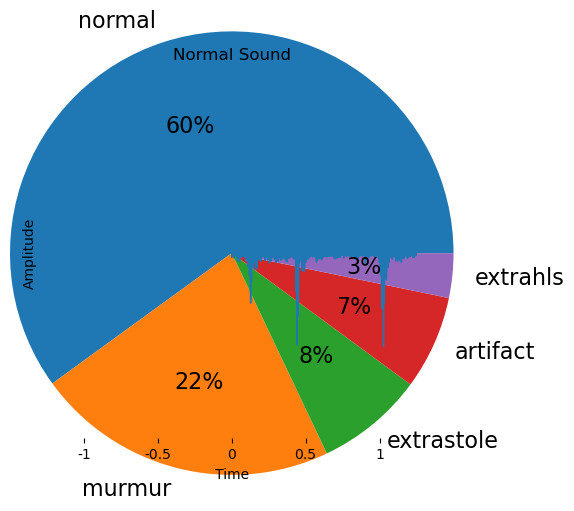

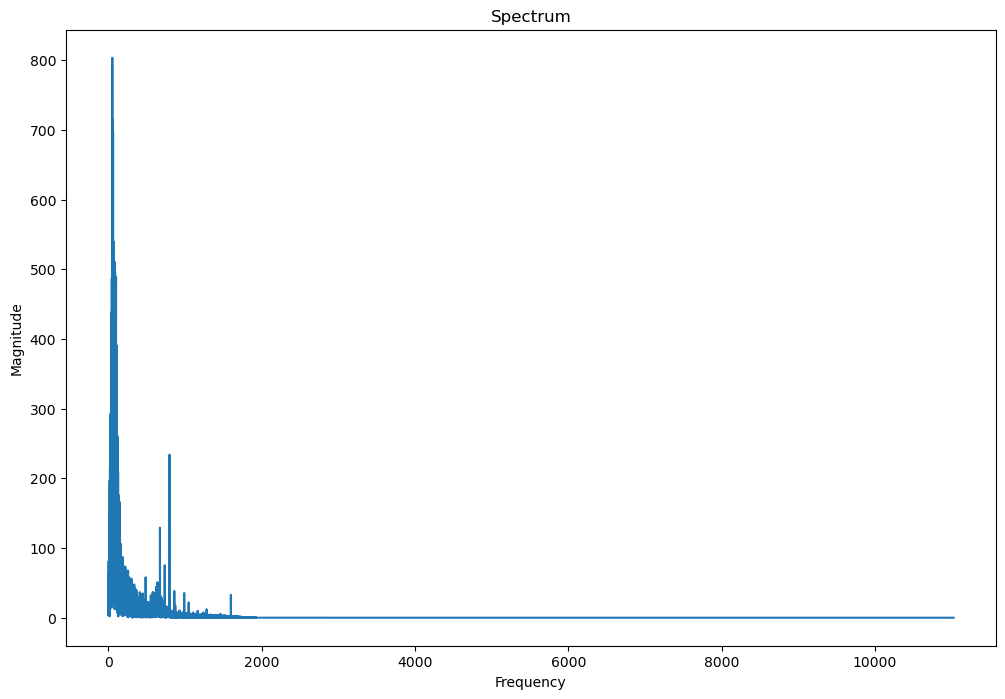

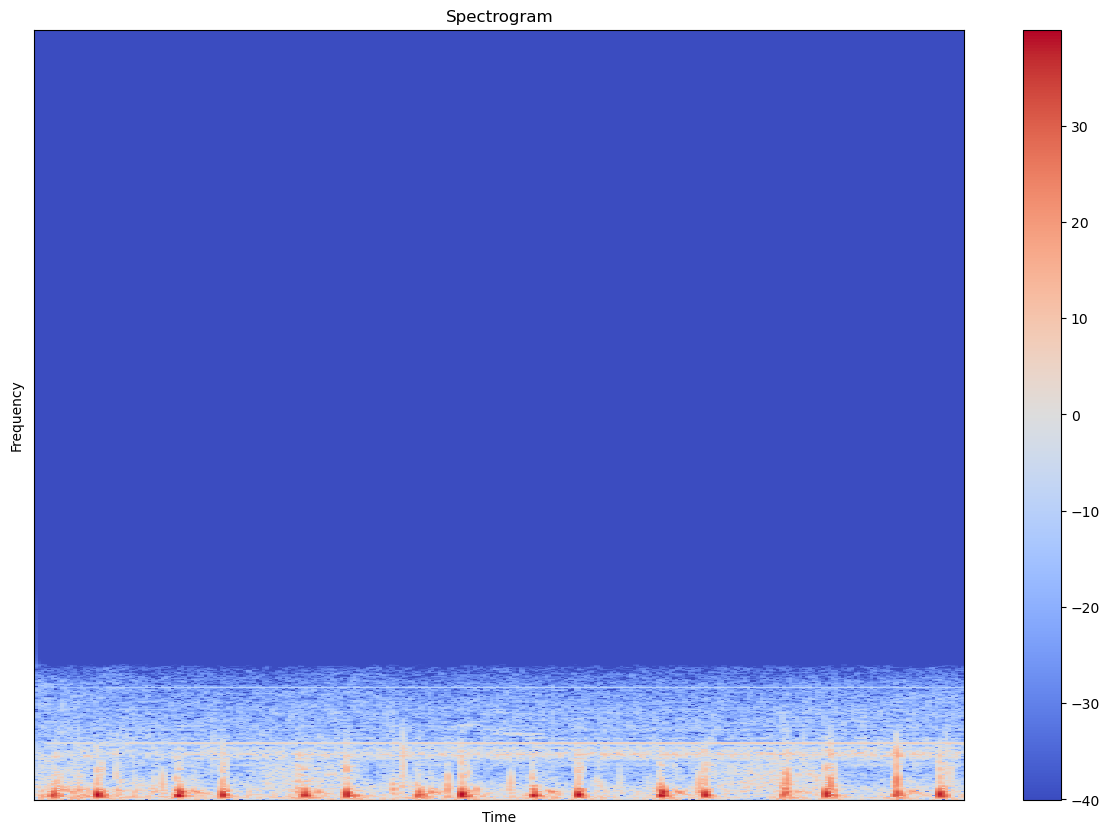

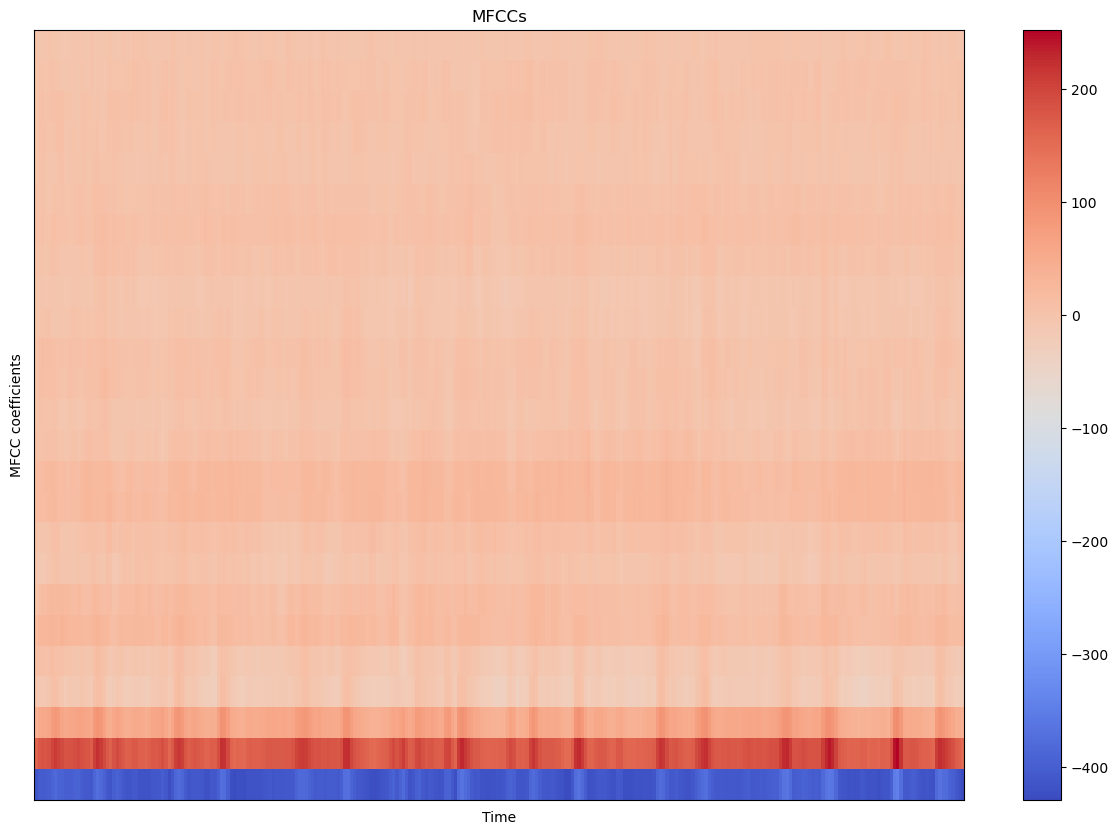

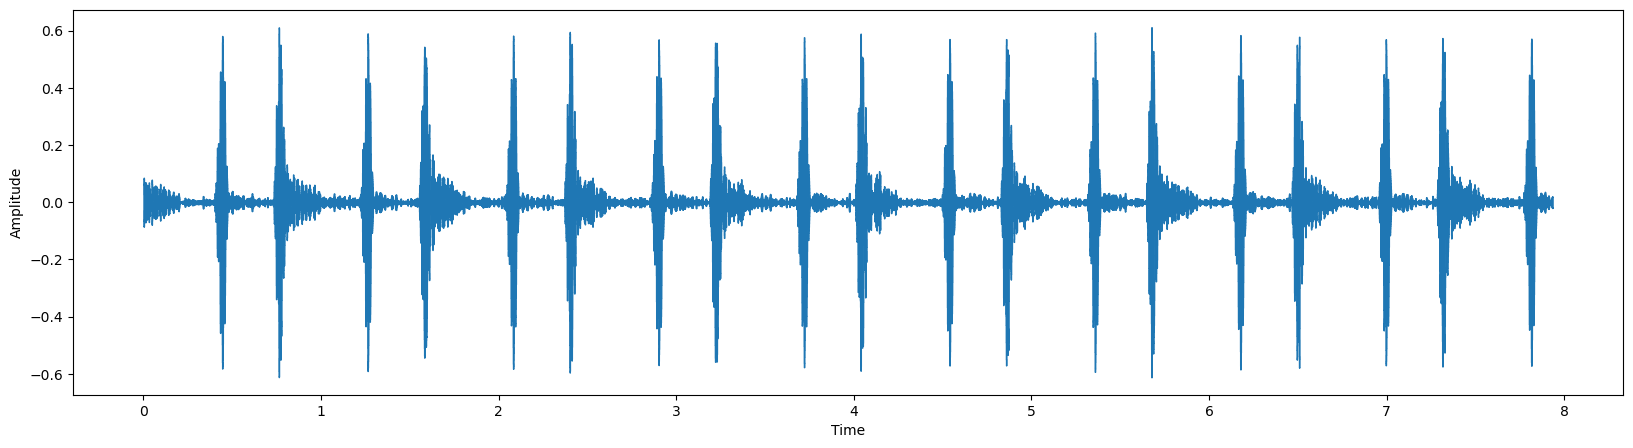

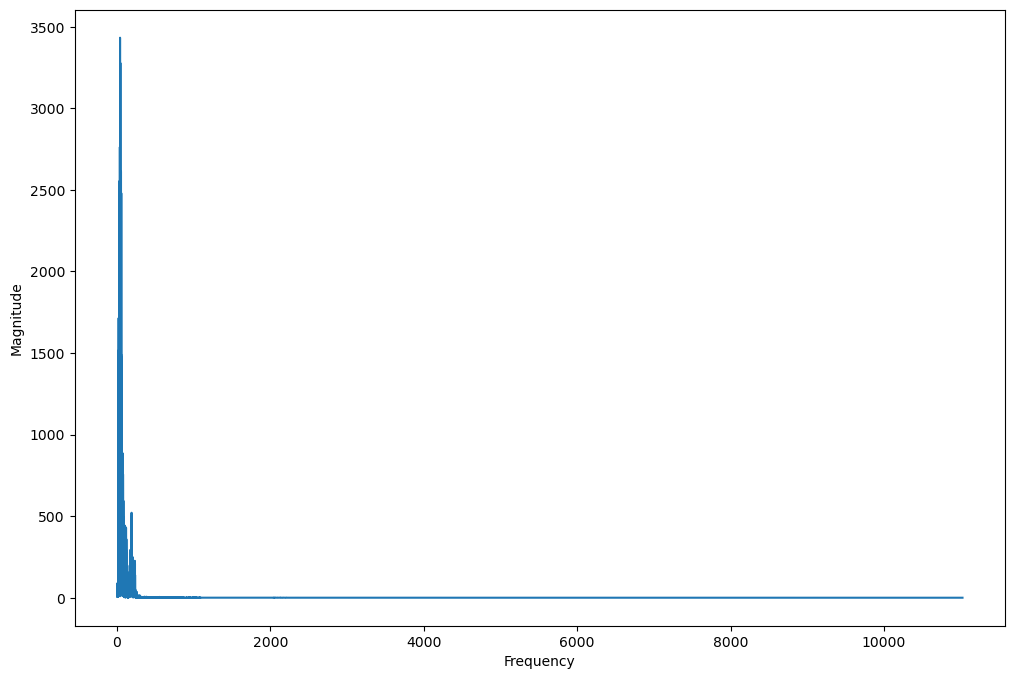

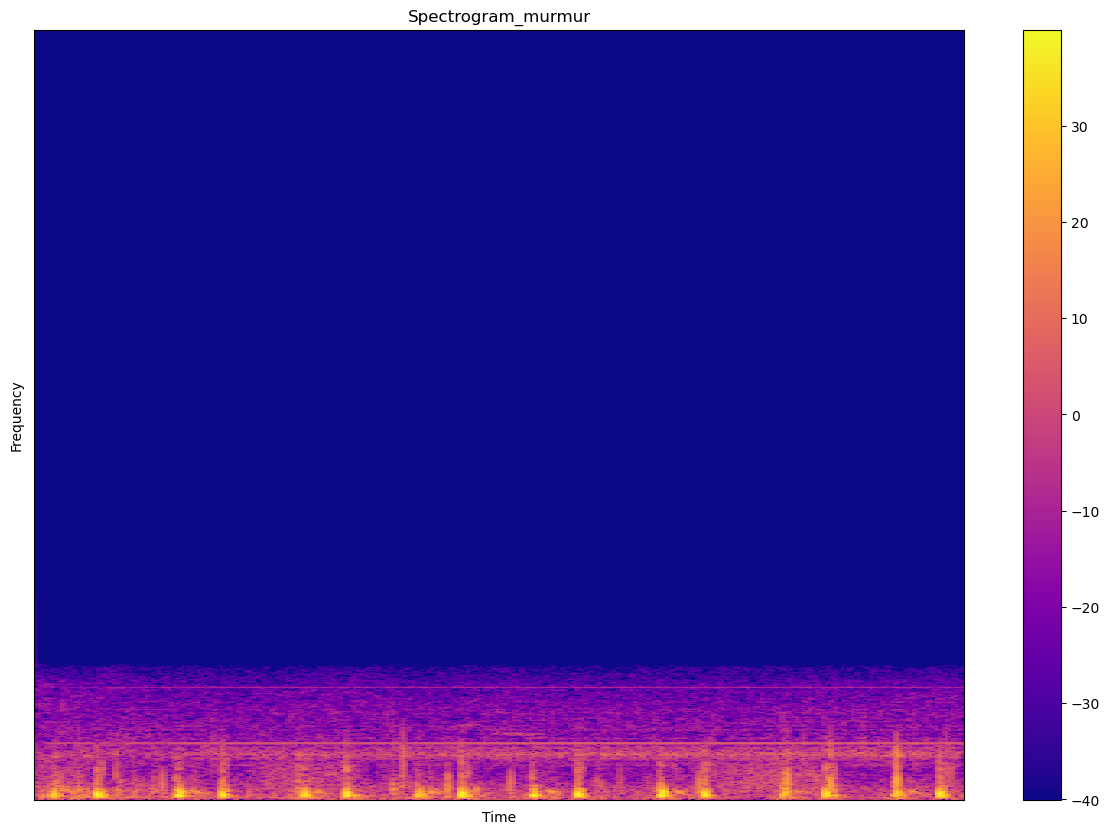

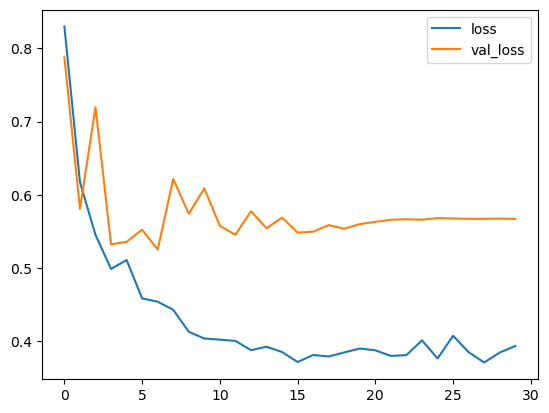

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [53]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

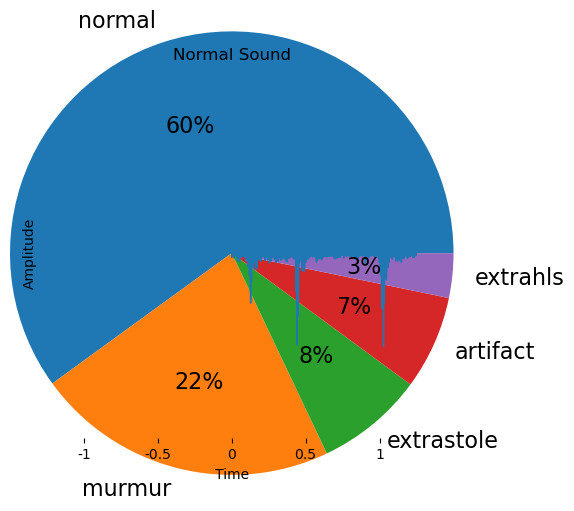

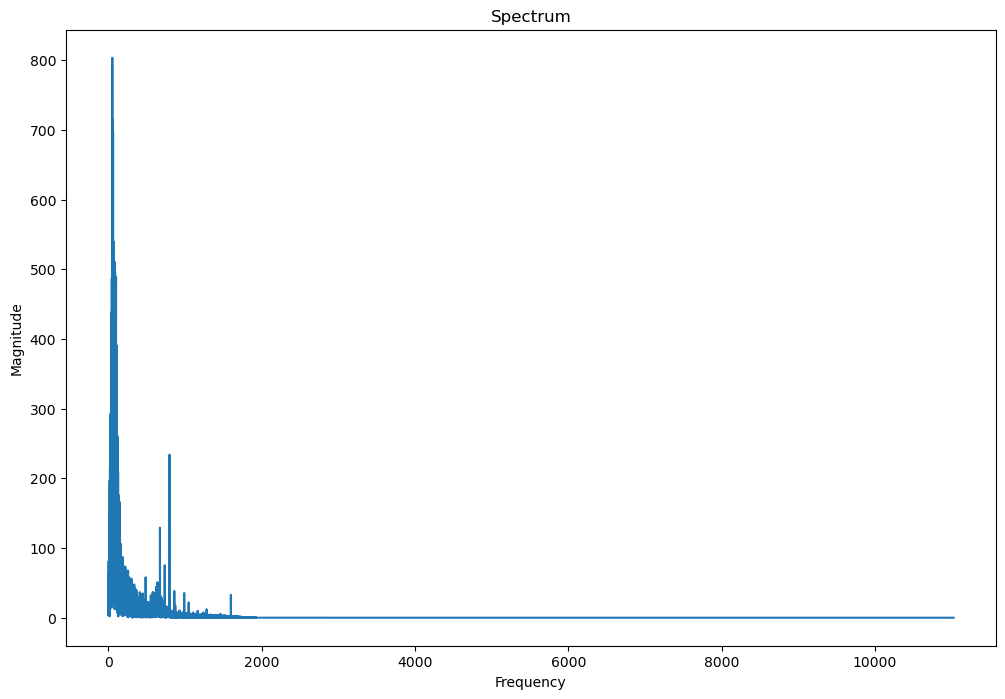

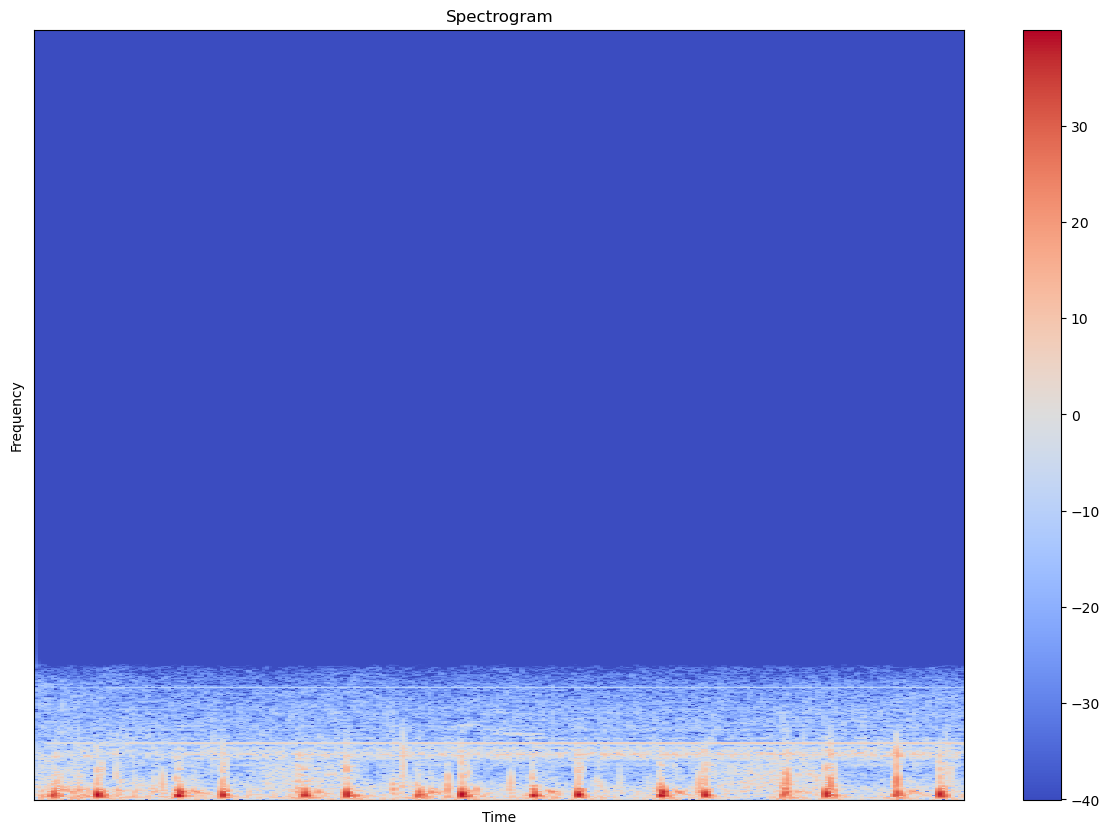

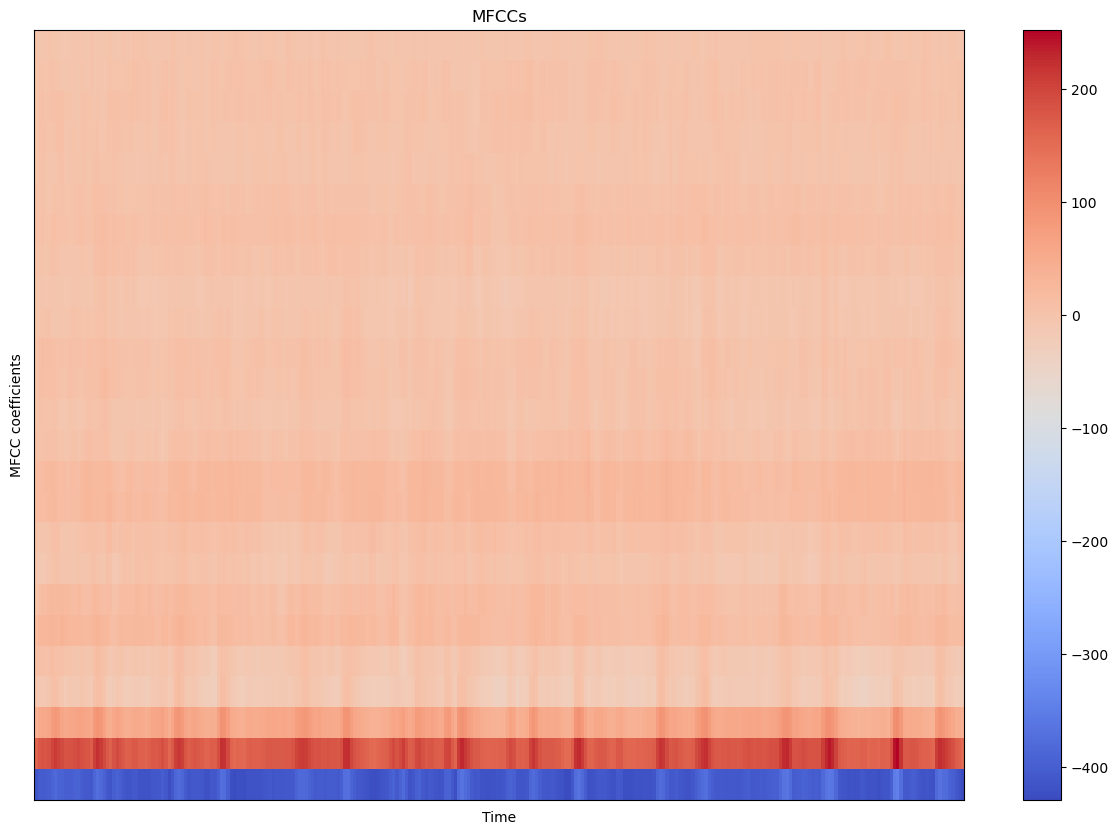

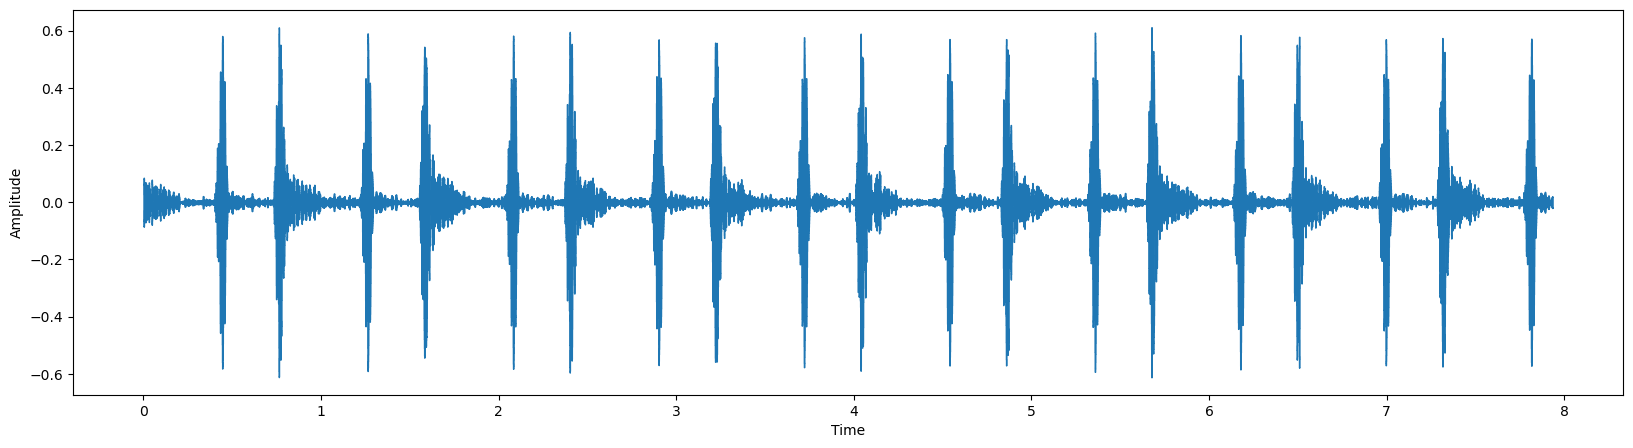

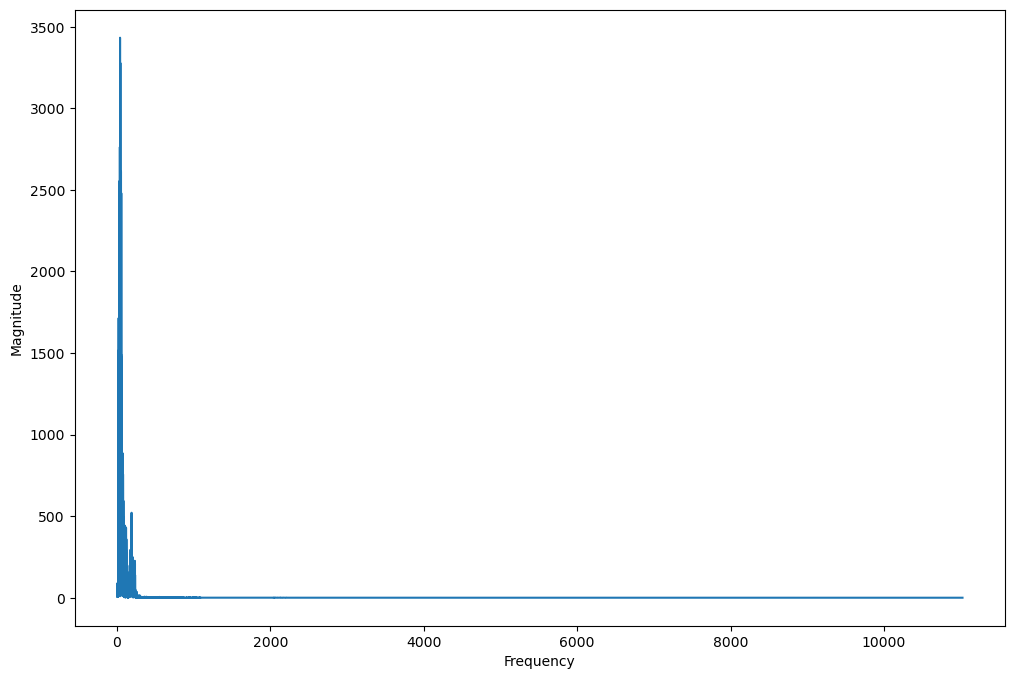

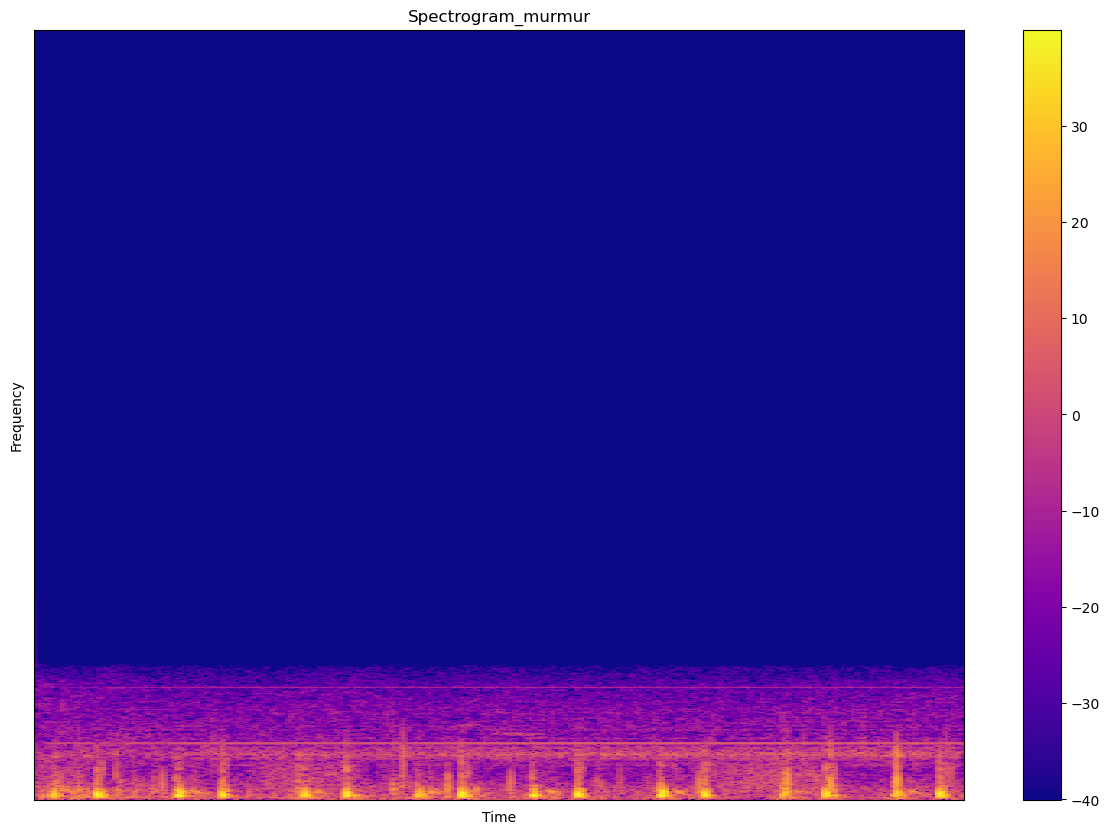

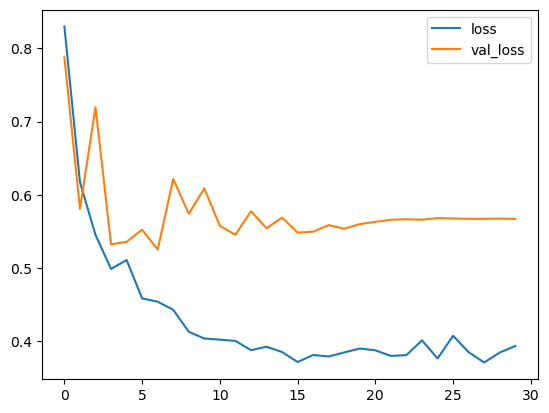

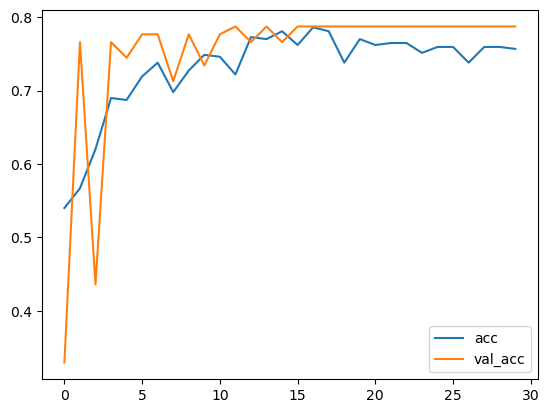

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [54]:
losses[['acc','val_acc']].plot()

In [55]:
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

4/4 [==============================] - 0s 9ms/step - loss: 0.4958 - acc: 0.7778
Model evaluation accuracy:  78 %


In [56]:
model.save('heart_sounds.h5')

In [57]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

4/4 [==============================] - 0s 5ms/step
prediction test return : 1 - murmur


In [58]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [59]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

4/4 [==============================] - 0s 5ms/step


In [60]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00         8
      murmur       0.45      0.82      0.58        22
      normal       0.94      0.75      0.83        87

    accuracy                           0.78       117
   macro avg       0.80      0.86      0.80       117
weighted avg       0.85      0.78      0.80       117



In [61]:
pip install ydata-synthetic

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Public\\anaconda\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [65]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,